In [1]:
# 0. Import packages:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [3]:
"""
code demonstrates how to update beliefs (in the form of the posterior) using prior information (prior)
and new evidence (likelihood). This is the essence of Bayesian updating
"""

#%% 1. The simple version of Bayes theorem
# This code calculates a posterior p(A|B) from a prior p(A), the likelihood of
# B given A, and the baserate p(B).
# p(A|B) = p(A) * p(B|A) / P(B)
prior = 0.05 #p(A)
likelihood = 1 # p(B|A)
baserate = 0.0625 #p(B)
posterior = prior*likelihood/baserate

In [5]:
"""
what happens to the posterior if the prior is extremely low? Or if the likelihood is very strong?
"""
#%% 2. The explicit form of Bayes theorem
# This code implements the explicit version of Bayes theorem.
# It calculates a posterior p(A|B) from a prior p(A), the likelihood of B
# given A (likelihood1) and likelihood of B given not A (likelihood2).
# p(A|B) = p(A) * p(B|A) / ( p(A) * p(B|A) + (1-p(A)) * p(B|~A) )

prior = 0.3
likelihoodGivenA = 0.5
likelihoodGivenNotA = 0.25
posterior = (prior*likelihoodGivenA)/(prior*likelihoodGivenA+(1-prior)*likelihoodGivenNotA)
posterior

0.46153846153846156

In [6]:
"""
Monty Hall problem
"""
import random

num_sim = int(1e4)
switch = True
jackpot_count = 0

for sim in range(num_sim):
    # door chosen: A random door holds the prize
    door = random.randint(0,2)

    # actual choice: We choose a random door to begin with
    choose = random.randint(0,2)

    # monty chooses a door to open
    all_choices = set([0,1,2])
    all_choices.discard(choose) # Obviously no point in opening an already opened door
    all_choices.discard(door) # There is no way Monty is revealing the prize
    monty_opens = random.choice(list(all_choices)) # Monty chooses a random door which doesn't have the prize behind

    # do you switch?
    if switch:
        all_choices = set([0,1,2])
        all_choices.discard(monty_opens) # if you choose to switch, you aren't going to choose the door monty opened
        all_choices.discard(choose) # you are switching so not going to choose the originally chosen door
        choose = random.choice(list(all_choices)) # should have just one choice at this point

    # did we win?
    if choose == door:
        jackpot_count += 1
# Additional Resources: https://www.youtube.com/watch?v=9vRUxbzJZ9Y&ab_channel=AsapSCIENCE

In [7]:
jackpot_count/num_sim

0.6662

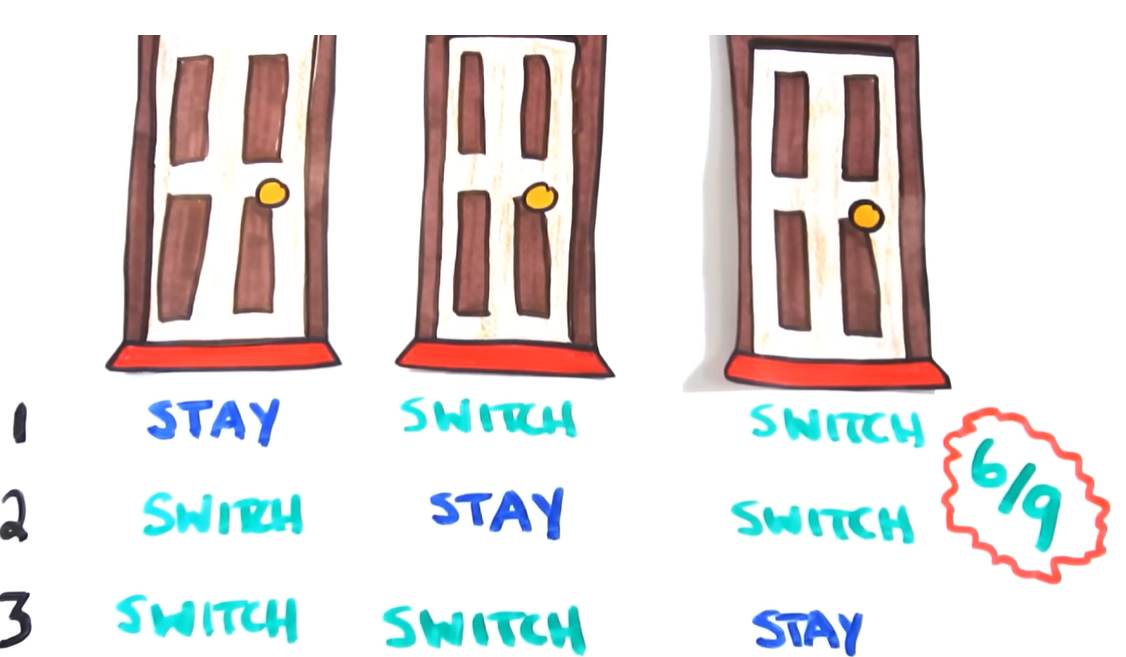

In [8]:
"""
pDH1 and pDH0 represent the likelihood of the observed data under H1 and H0
"""
#%% 3. The Bayes factor
pDH1 = 0.5 # probability of data given alternative hypothesis
pDH0 = 0.1 # probability of data given null hypothesis
bf10 = pDH1/pDH0 # The BF10 = 5 -> "Moderate evidence for H1"

In [9]:
"""
Context:
Imagine you're a scientist in a field where researchers are constantly testing new drugs.
Some drugs have genuine effects (they work), while others don't. You come across a new study
that claims a particular drug is effective based on statistical significance.

R (Prior Belief):
Before diving into the study, you have some prior knowledge about the field. You know that, historically,
only 10% of the drugs tested in this field actually work, while 90% don't. This is your prior belief.
R = Ratio of true effects (drugs that work) to false effects (drugs that don't work) = 0.10

Bayes Factor (BF):
Now, you dive into the study's data. You want to know how much more likely the observed results are under the hypothesis that the drug works (H1)
compared to the hypothesis that it doesn't (H0)

Positive Predictive Value (PPV)
Now, just because the study is statistically significant doesn't mean the drug truly works.
There's a chance of false positives (Type I error). The PPV helps you quantify this.

α (probability of getting a significant result when the drug doesn't work) = 0.05
β (probability of not getting a significant result when the drug does work) = 0.2

The PPV gives a more nuanced view, combining the study's evidence with prior knowledge about the field
"""

#%% 4. PPV - "positive predictive value" - what we actually want to know
# p that something that is significant is true

# Initialize variables:
alpha = 0.05 # fisher's choice
beta = 0.2 # classic choice of acceptable beta error
R = 0.5 # Ratio of true to false effects. What we want to know - this is our prior belief
ppv = ((1-beta)*R)/(R-beta*R+alpha) # solution for a given R
ppv

0.888888888888889

Text(0, 0.5, 'ppv')

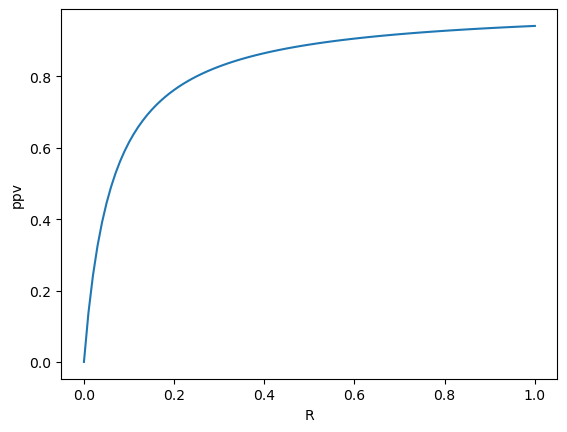

In [10]:
# What if we are agnostic - let's explore all Rs:
R = np.linspace(0,1,101) # 0 to 1 in .01 increments
ppv = np.empty([len(R),1]) # initialize empty array
ppv[:] = np.NaN # convert to NaN
for ii in range(len(R)): # loop through each R
    ppv[ii] = ((1-beta)*R[ii])/(R[ii]-beta*R[ii]+alpha)

# Plot it:
plt.plot(R,ppv)
plt.xlabel('R')
plt.ylabel('ppv')

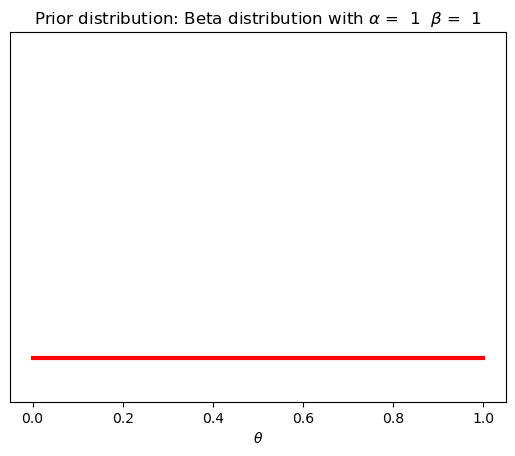

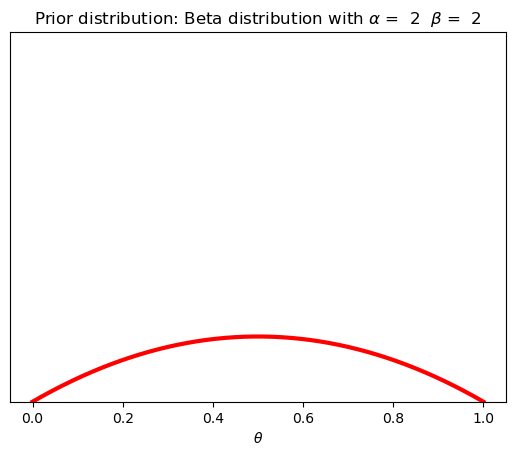

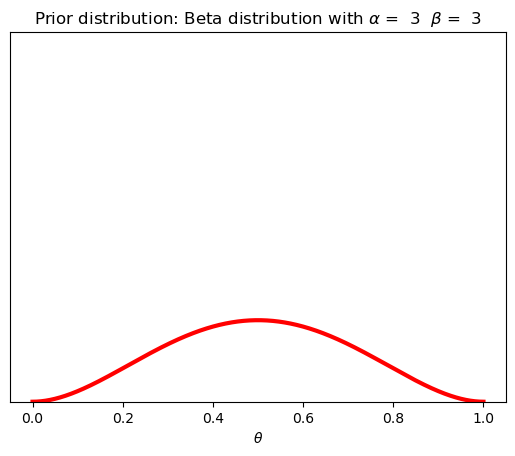

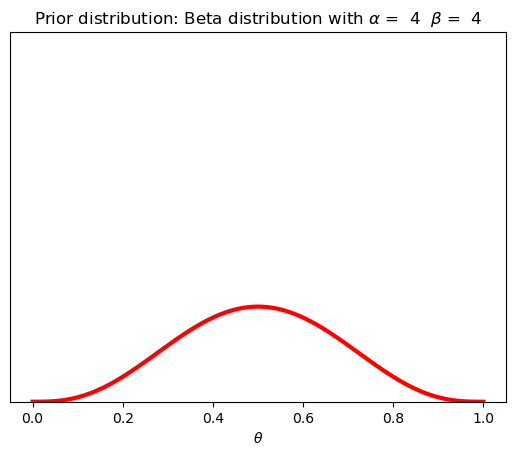

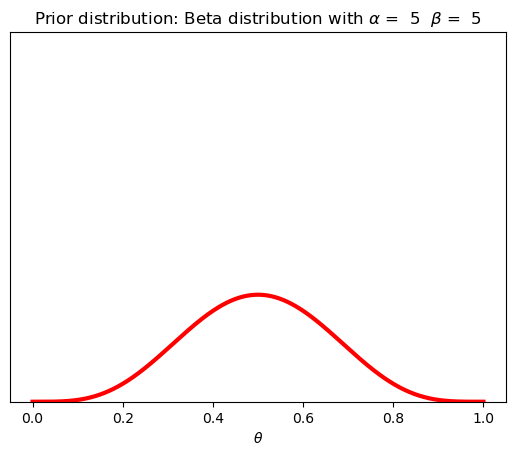

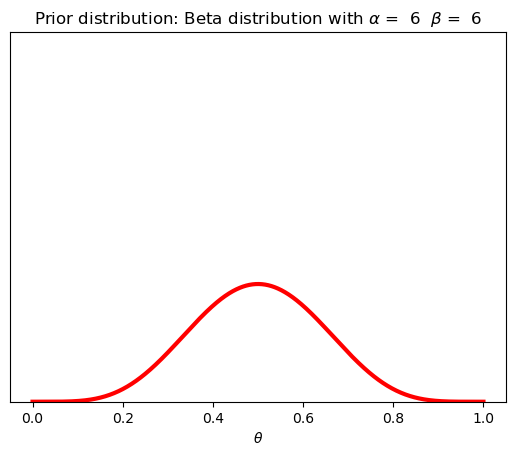

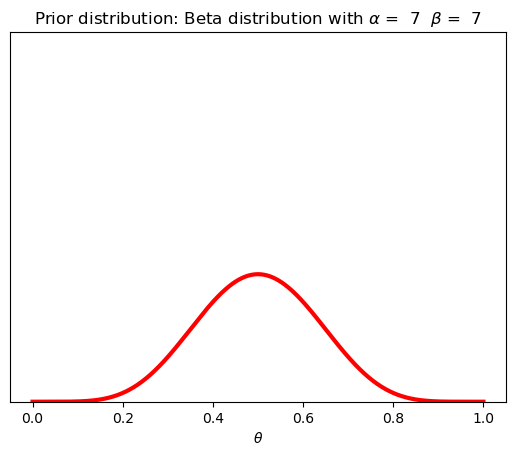

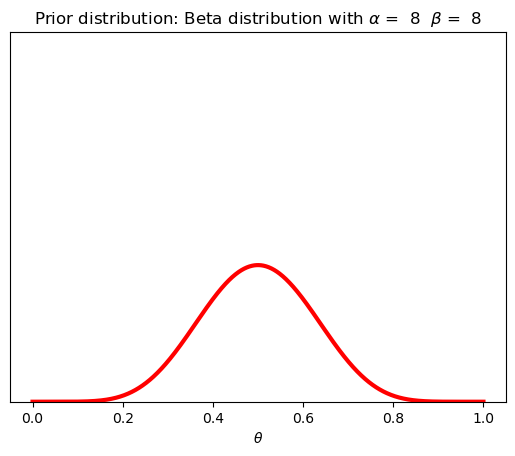

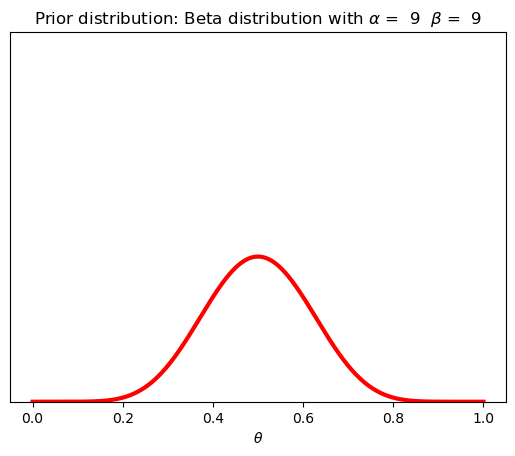

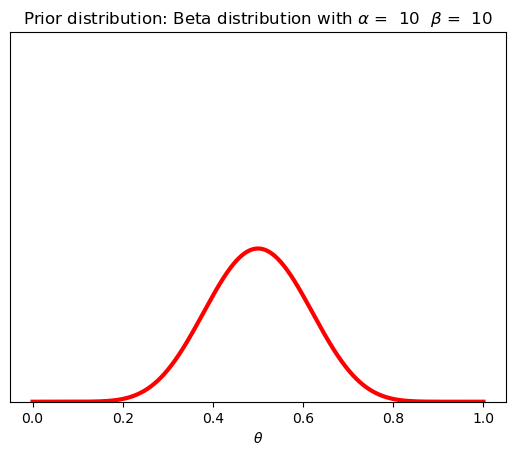

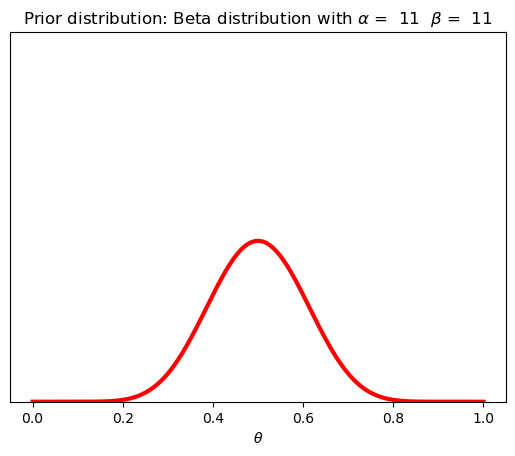

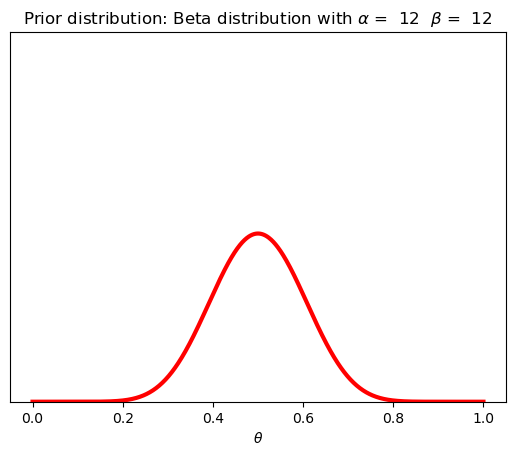

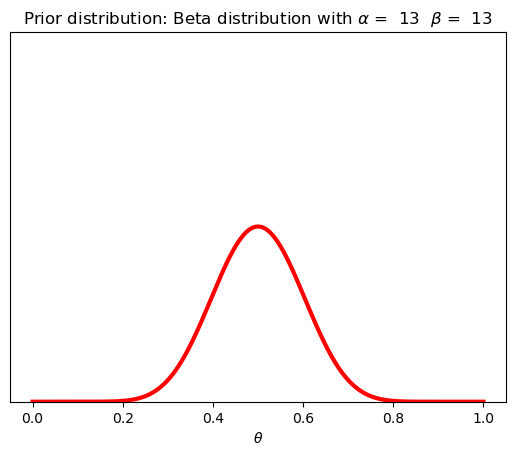

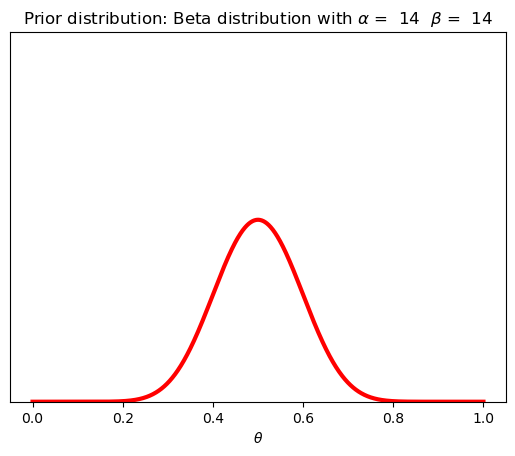

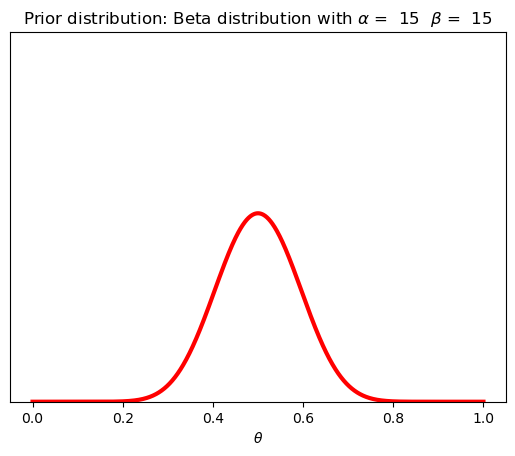

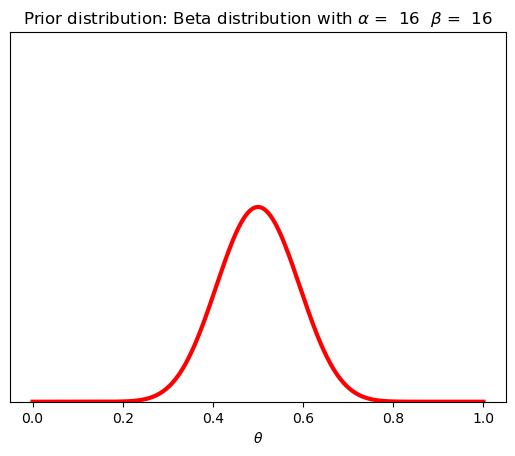

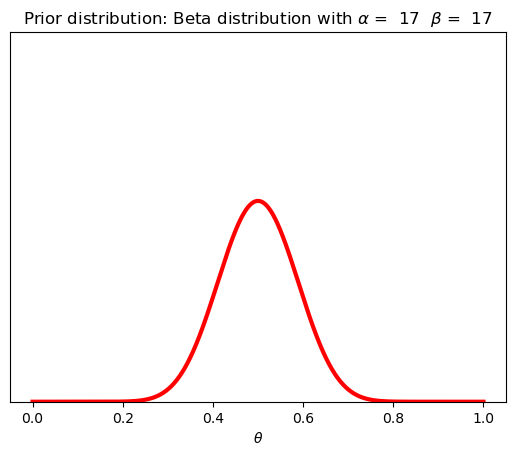

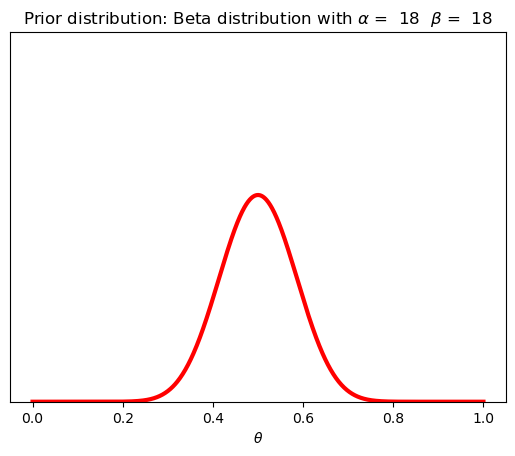

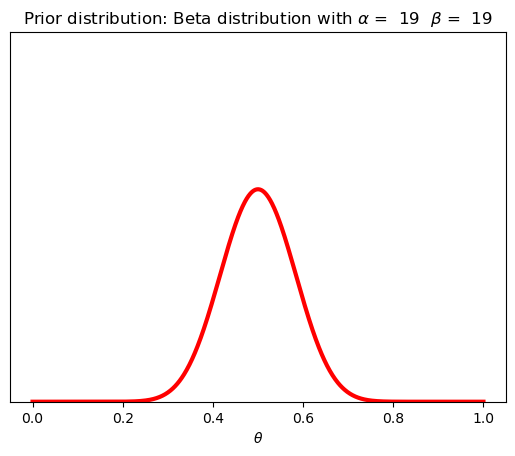

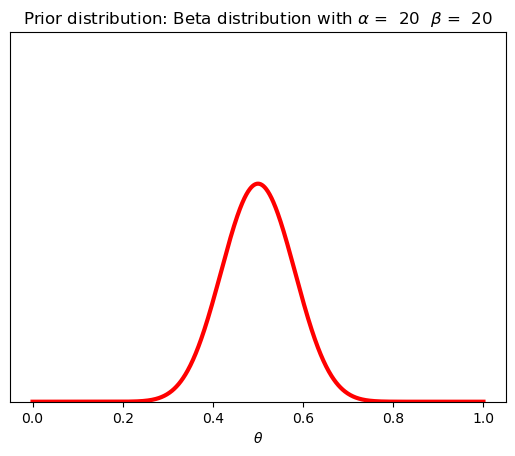

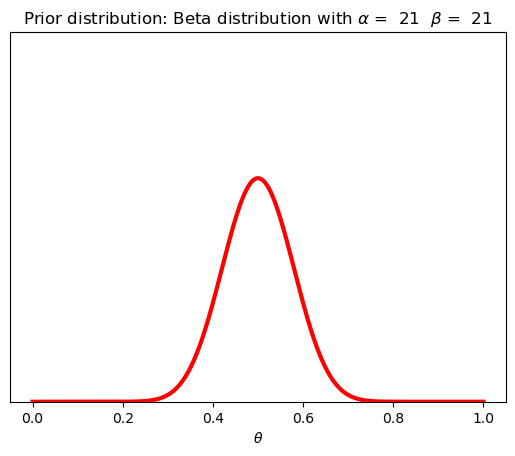

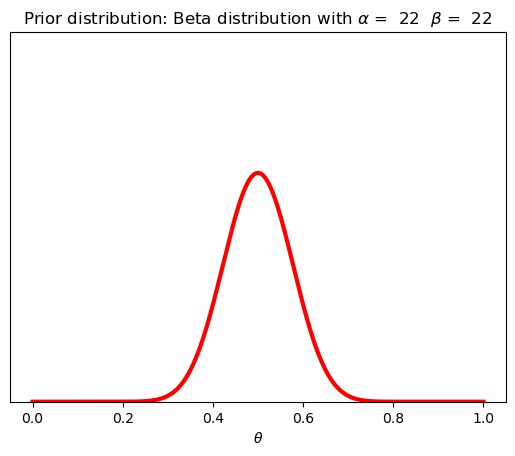

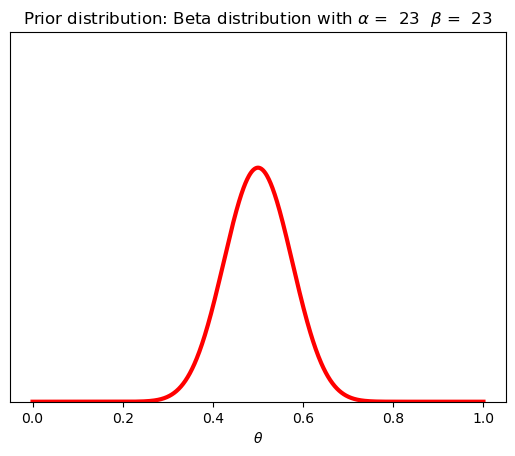

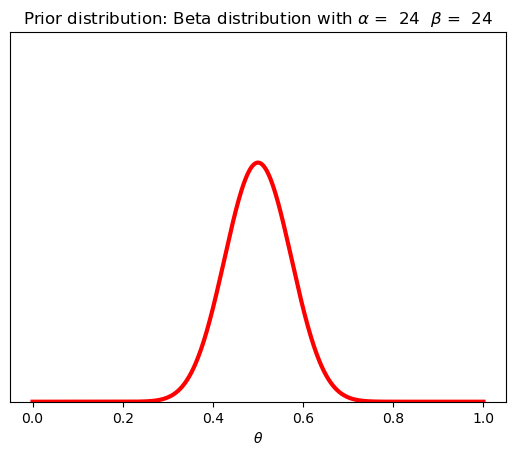

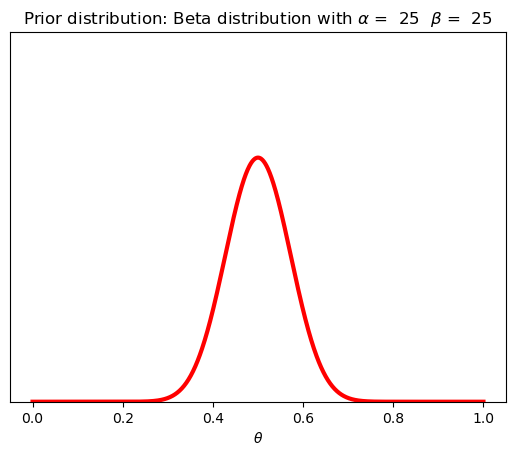

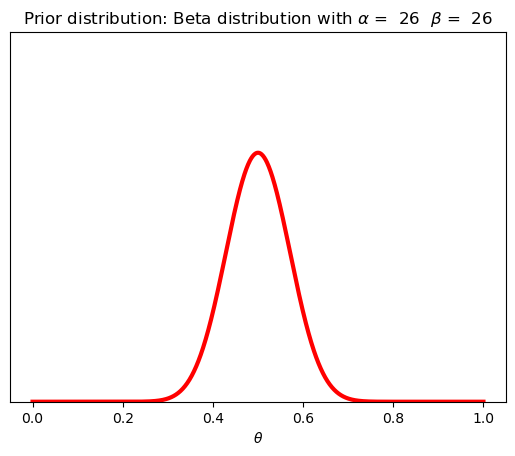

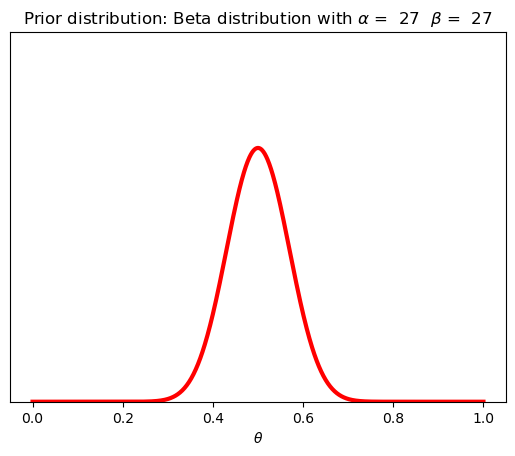

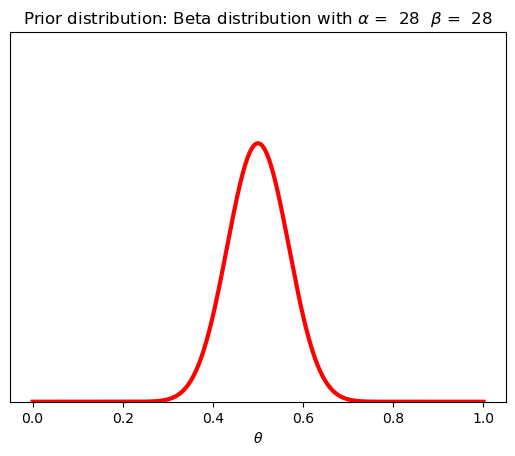

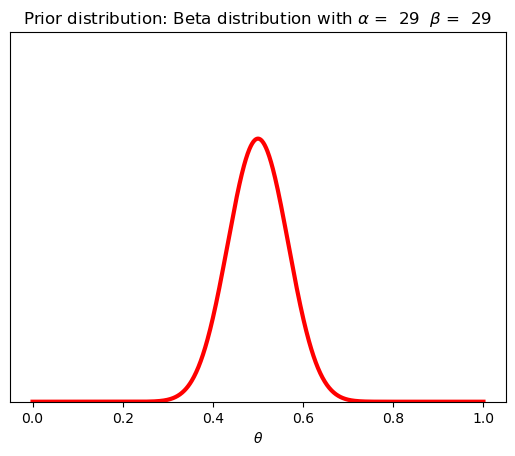

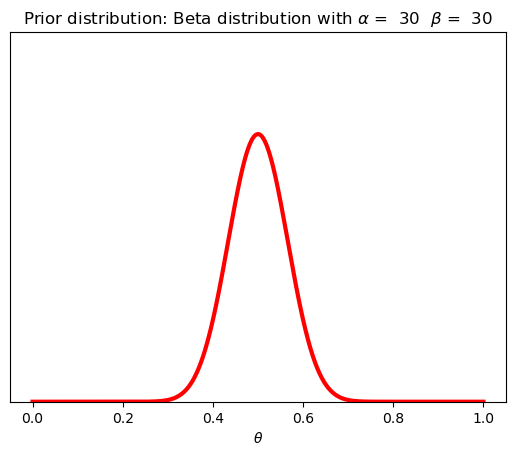

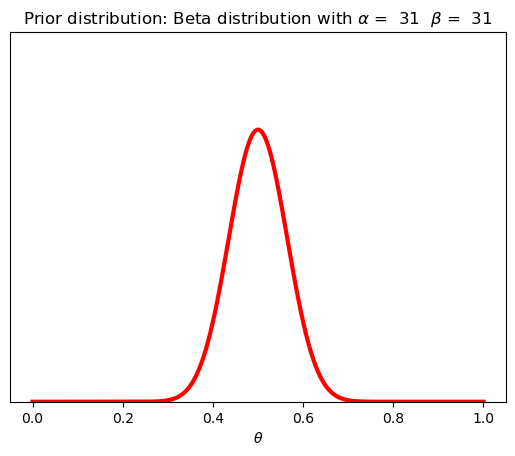

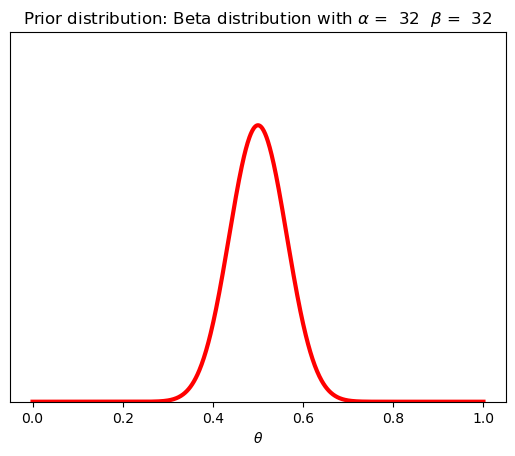

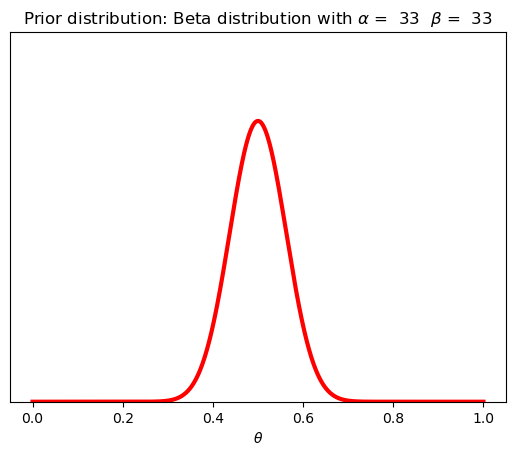

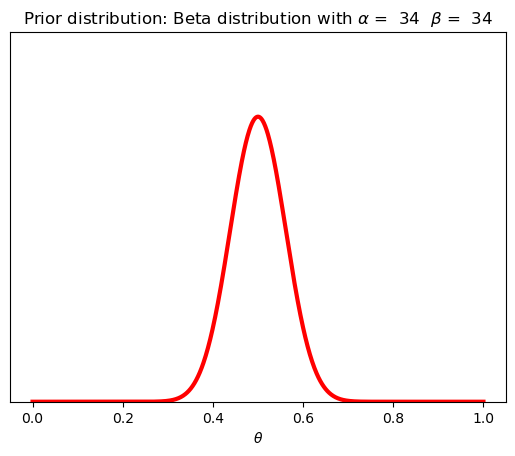

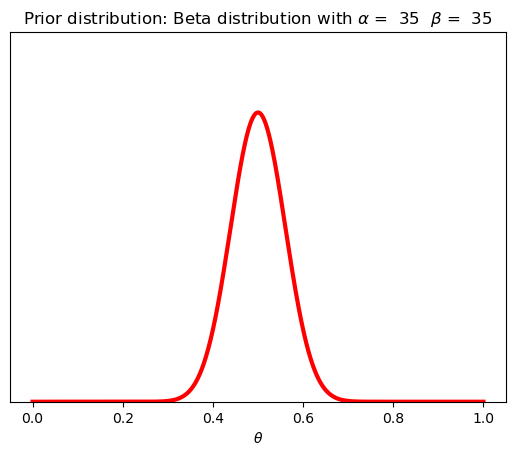

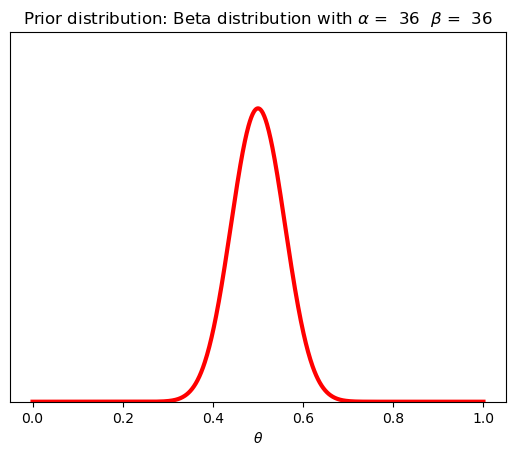

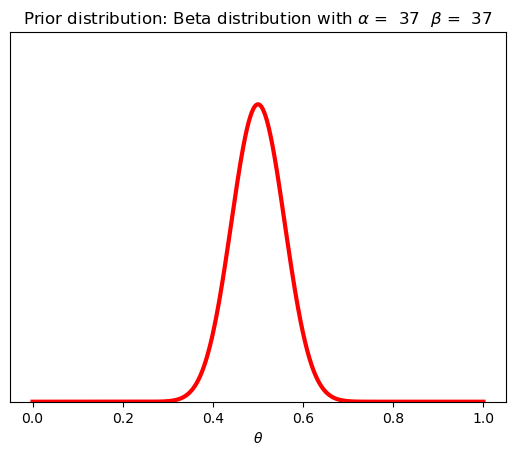

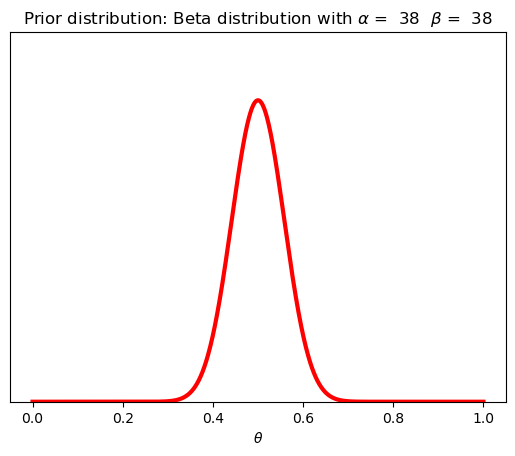

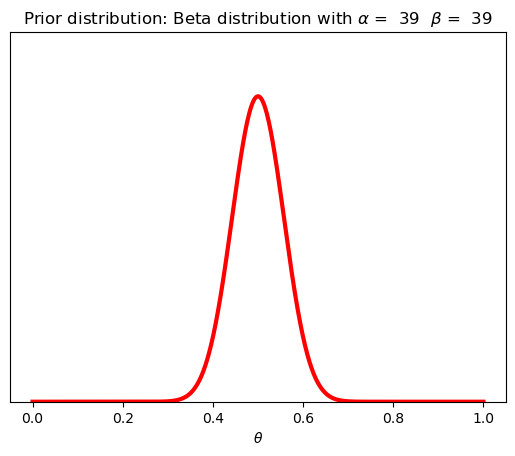

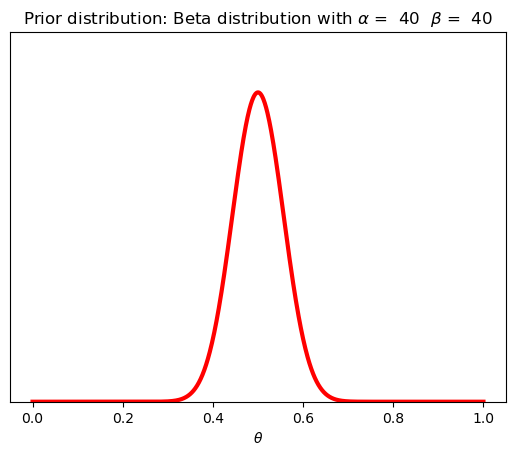

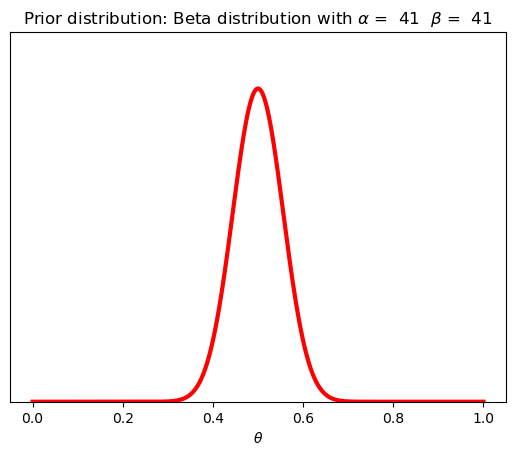

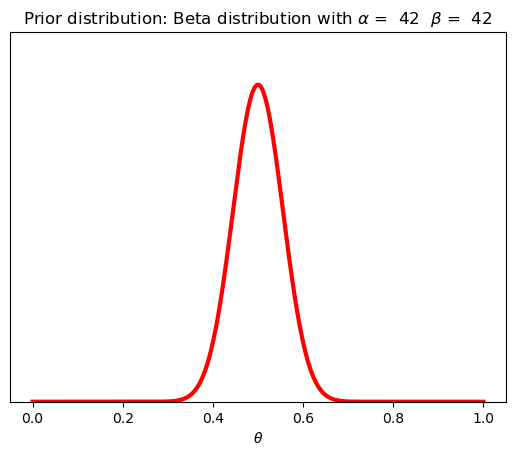

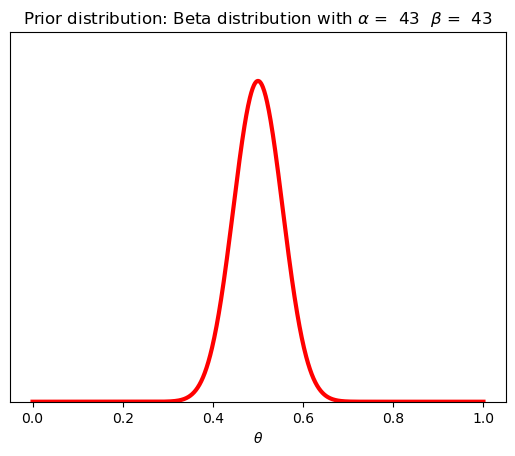

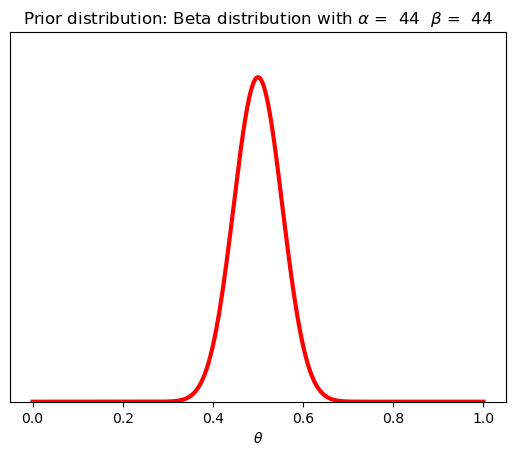

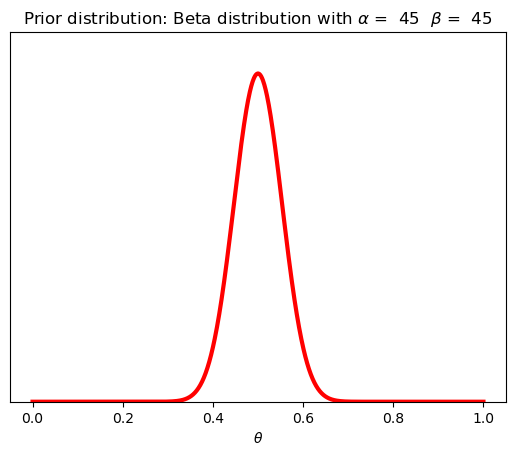

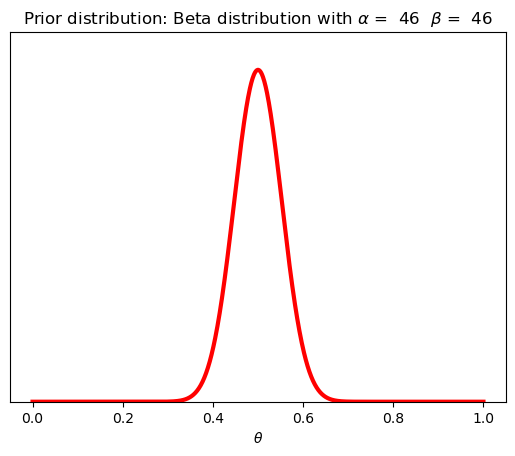

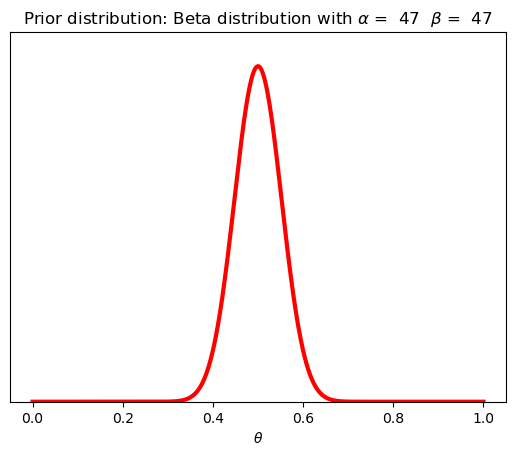

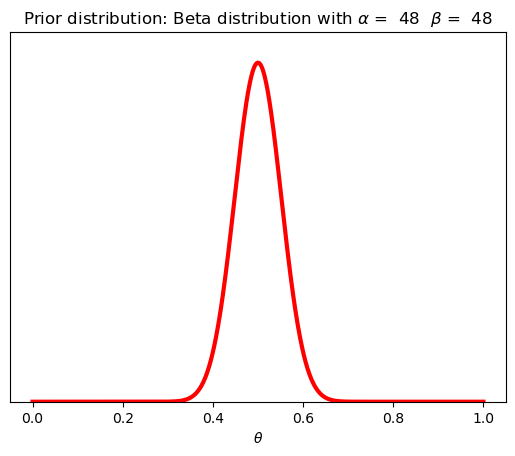

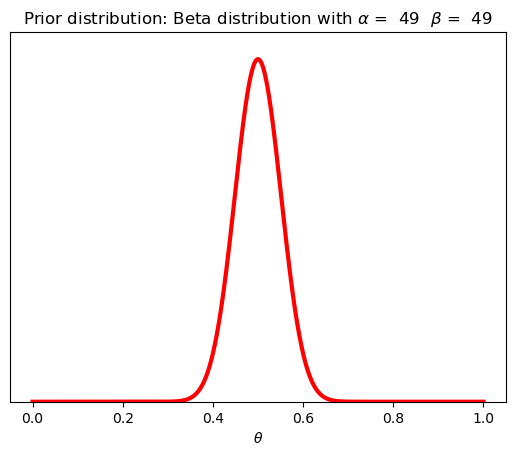

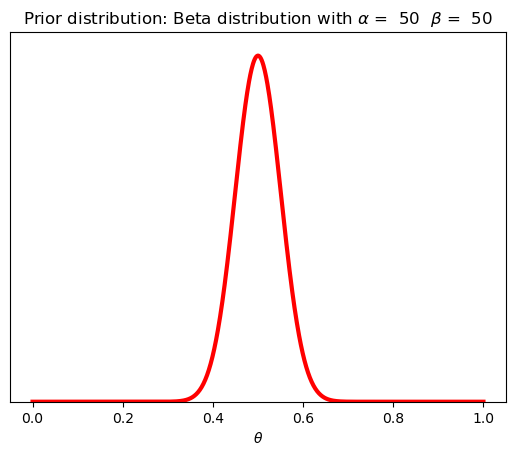

In [11]:
"""
Example: Online Product Reviews

Imagine you're launching a new product on an e-commerce platform, and you're interested in the proportion of
positive reviews it will receive. After a few days, you notice that the product has received 5 positive reviews and 3 negative reviews.

You want to model the proportion of positive reviews the product might receive in the long run.
A natural choice for this is the Beta distribution, given its suitability for modeling proportions.

Using the Beta Distribution:

If you had no prior belief about the product's reception (i.e., you believe all proportions of positive reviews from 0 to 1 are equally likely),
you might start with a Beta(1,1) distribution, which is equivalent to a uniform distribution.

Given the new data (5 positive reviews and 3 negative reviews), you update your beliefs.
In Bayesian statistics, this involves updating the parameters of your Beta distribution:

New alpha = 1 + 5 = 6
New beta = 1 + 3 = 4

Your updated belief about the proportion of positive reviews is now modeled by a Beta(6,4) distribution.

Why would you want something as a distribution?

Uncertainty Representation: Real-world phenomena are often uncertain. Distributions allow us to capture and quantify this uncertainty.
Instead of making a point estimate (like "the proportion of positive reviews is 0.6"), you can express a range of possibilities
and their associated likelihoods.

Updating Beliefs: As new data becomes available, distributions (especially in the Bayesian framework) allow you to update your
beliefs in a systematic manner.

Predictive Insights: Distributions can provide insights into future outcomes. For instance, the Beta distribution
in our example can help you predict the range of positive reviews you might expect after 100 more reviews.

Why Beta distribution?
The shape of this distribution reflects your certainty or uncertainty about the true proportion.
A narrower peak means you're more certain, while a flatter distribution indicates more uncertainty.
Conjugate prior for binomial variables

What happens as we change alpha and beta?
"""

#%% 5. Modeling the prior distribution, trying several alpha and beta parameters
# 1. Init:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
numParameters = 50 # We are going to loop through 50 values of alpha and beta
x = np.linspace(0,1,1001)

# 2. Run simulation and plot:
for ii in range(numParameters): # Loop through each alpha and beta parameter
    alpha = ii+1
    beta = ii+1
    prior = stats.beta.pdf(x,alpha,beta) # Modeling the prior as a beta distribution with parameters alpha = beta -> note that mean remains constant
    # what happens to the distribution and why? -> given alpha: number of sucesses and beta: number of failures
    plt.plot(x,prior,color='red',linewidth=3)
    ax = plt.gca() # get current axes
    ax.axes.yaxis.set_visible(False) # remove y-axis ticks and labels
    plt.ylim(0,8.5) # hardcoded ylim
    plt.xlabel(r'$\theta$')
    plt.title('Prior distribution: Beta distribution with ' r'$\alpha$ =  {}  '.format(ii+1) + r'$\beta$ =  {}'.format(ii+1))
    plt.pause(0.1)

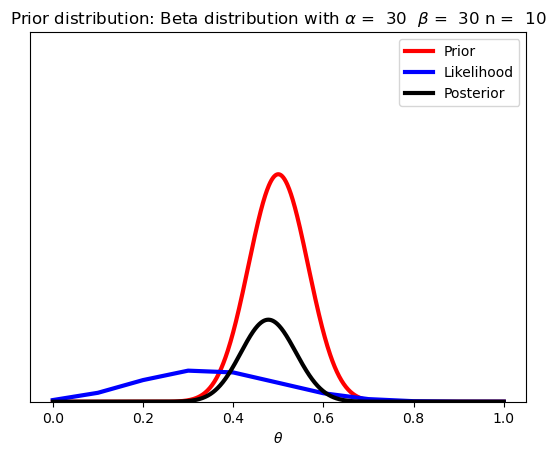

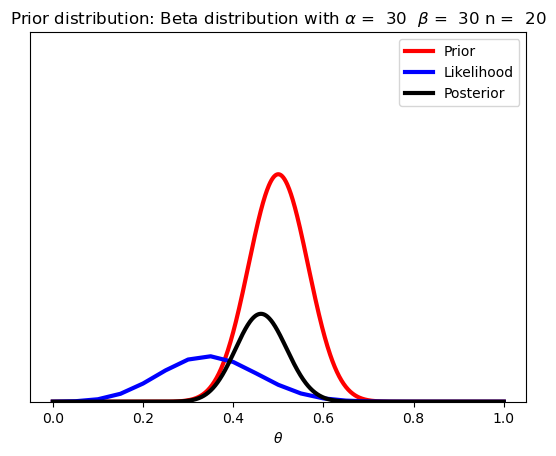

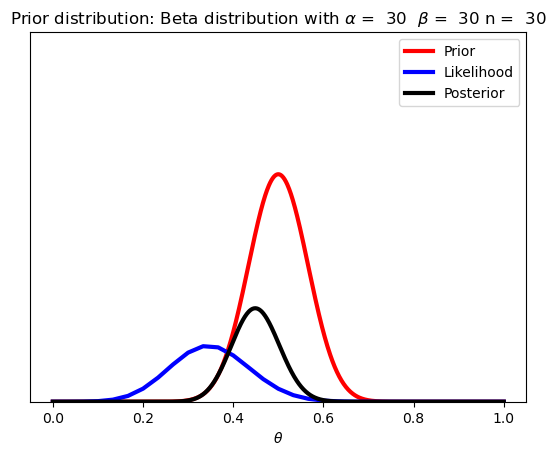

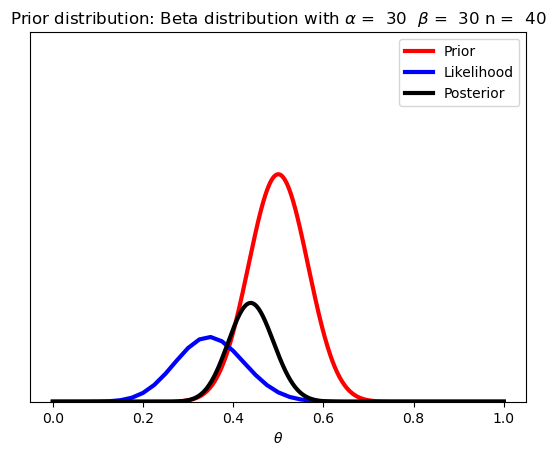

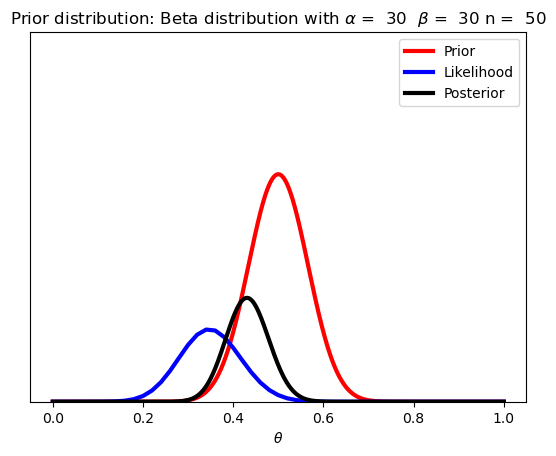

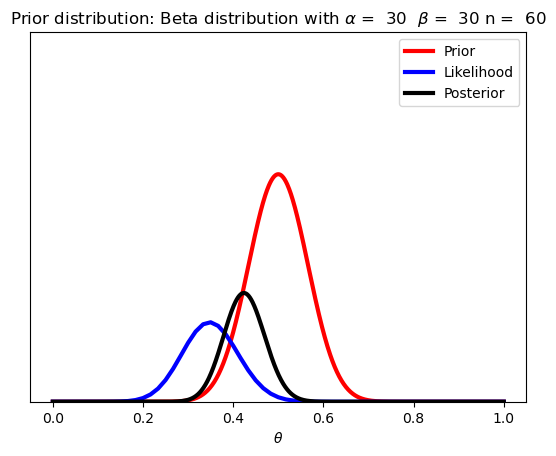

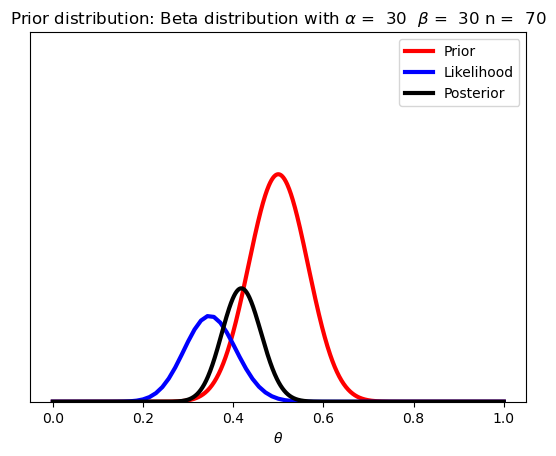

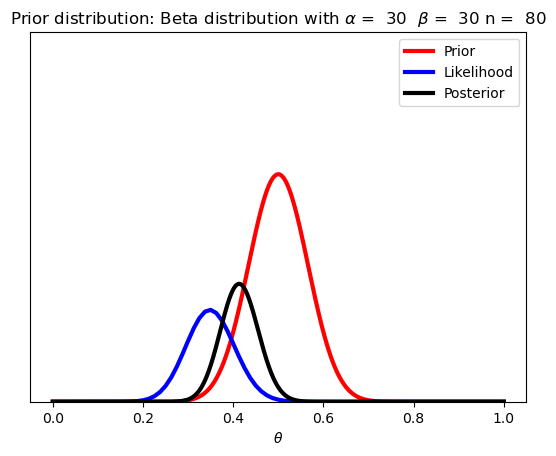

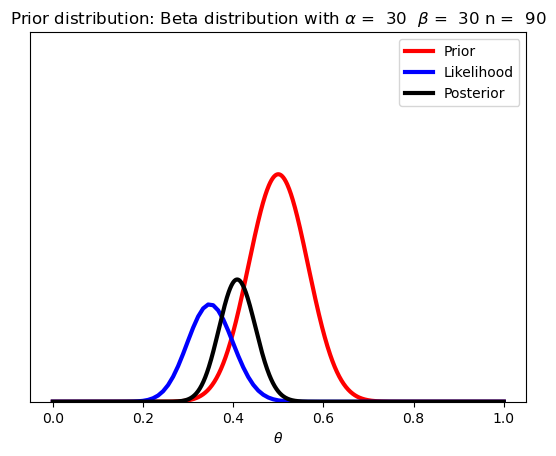

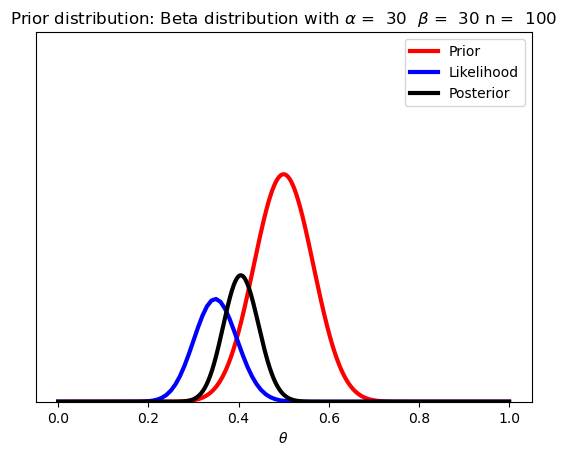

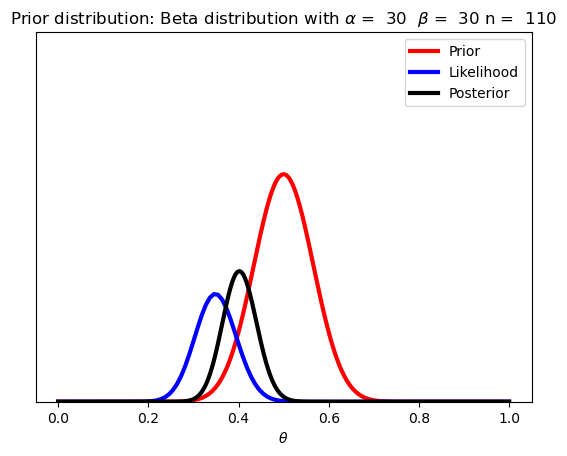

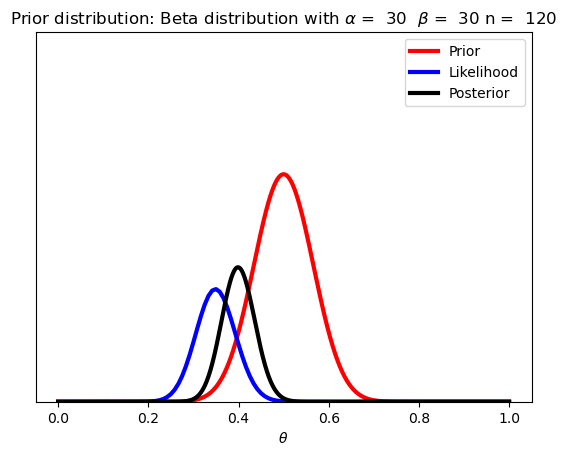

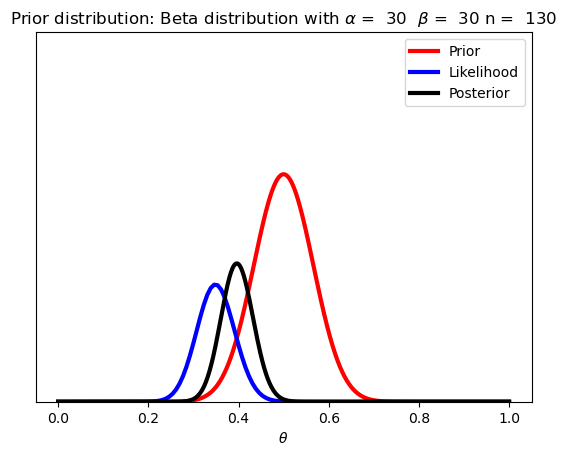

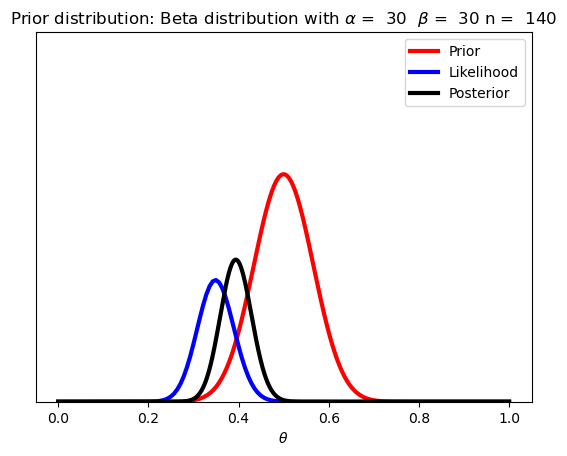

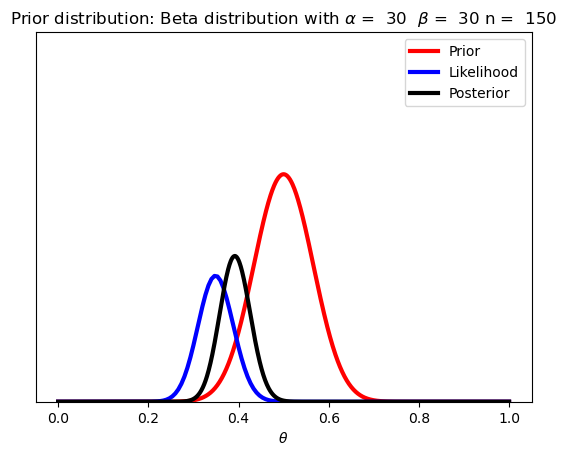

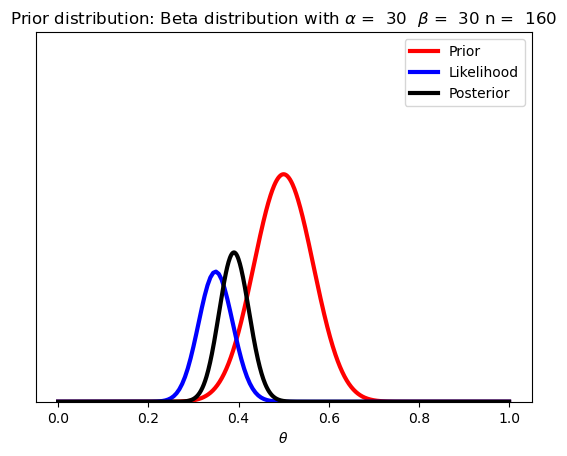

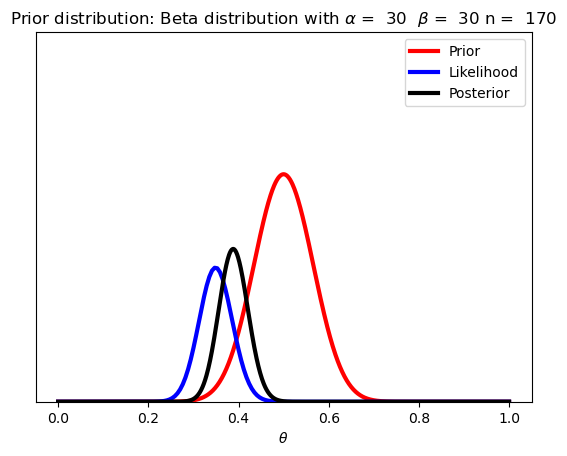

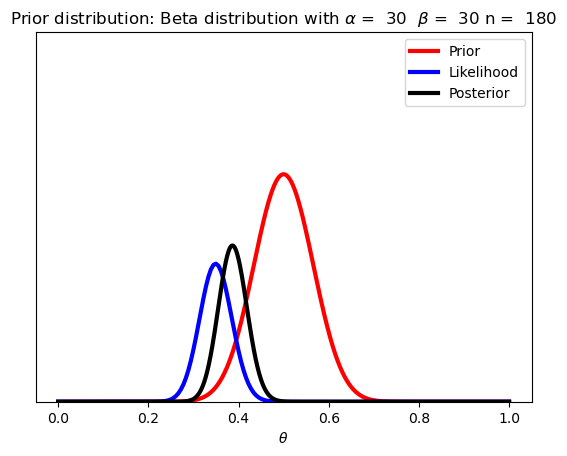

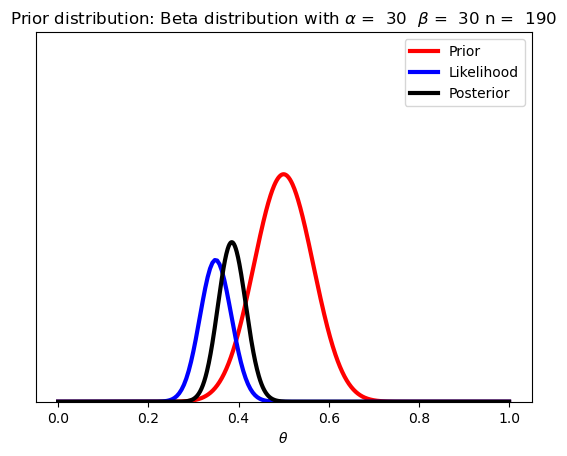

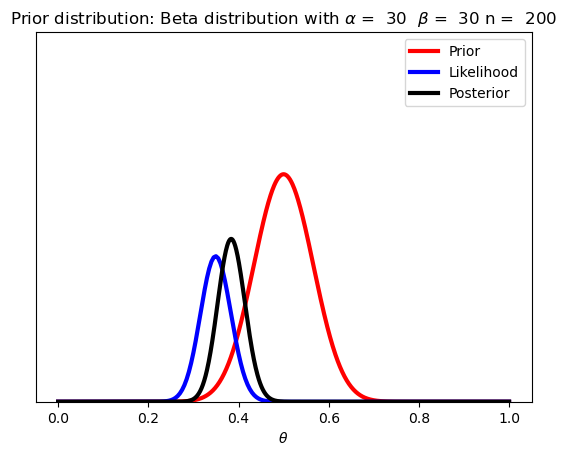

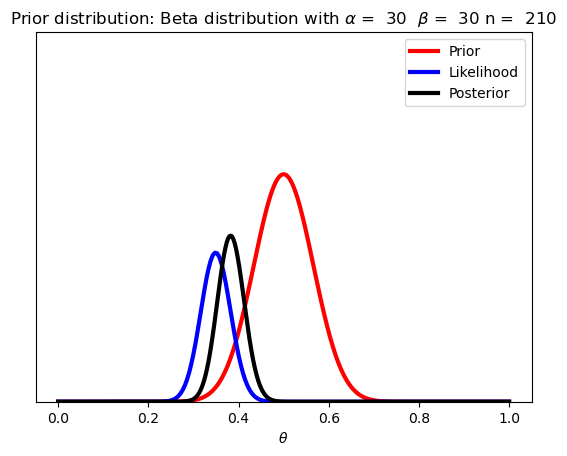

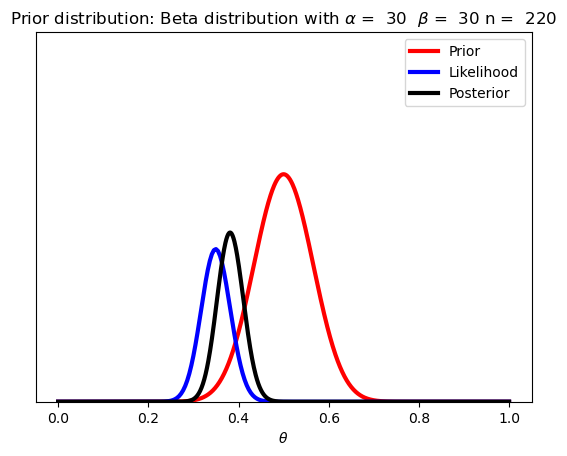

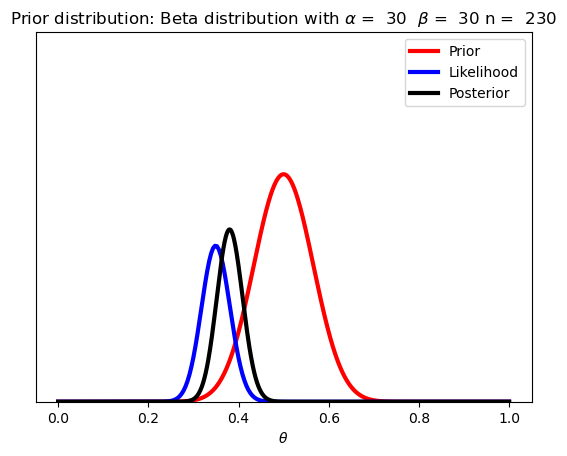

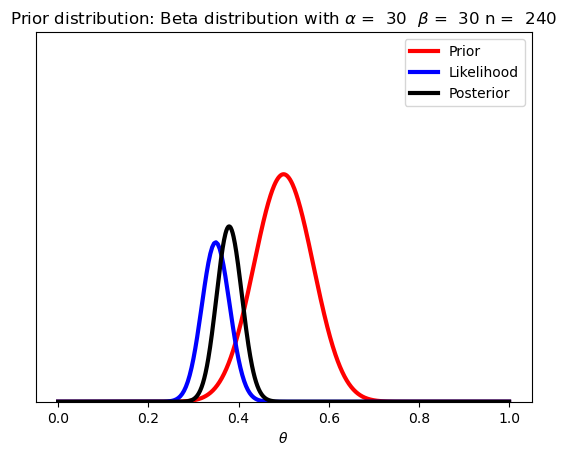

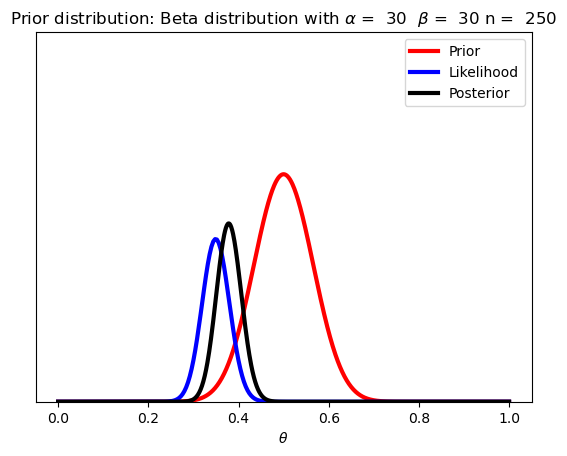

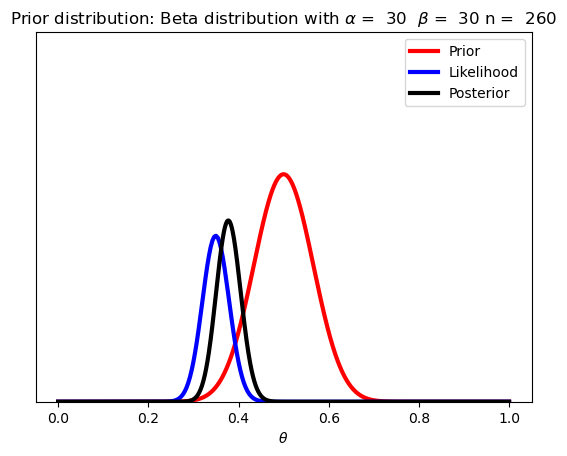

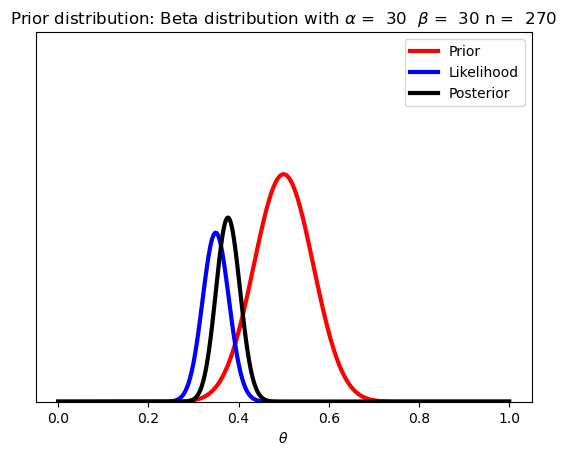

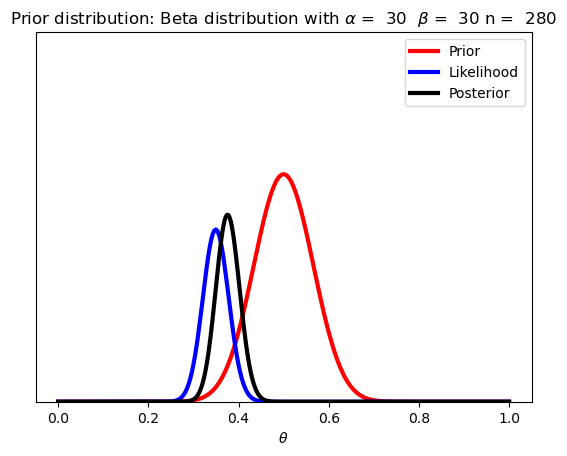

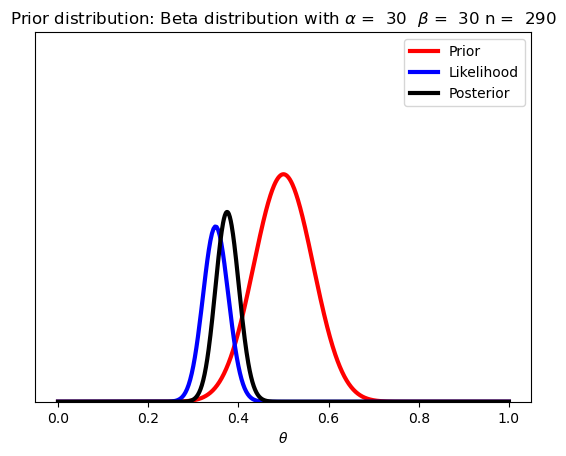

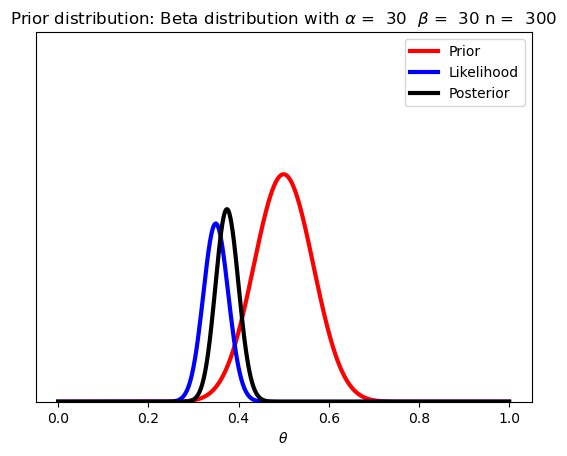

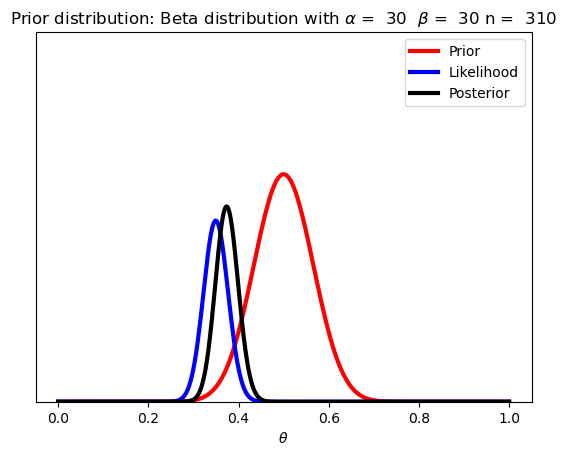

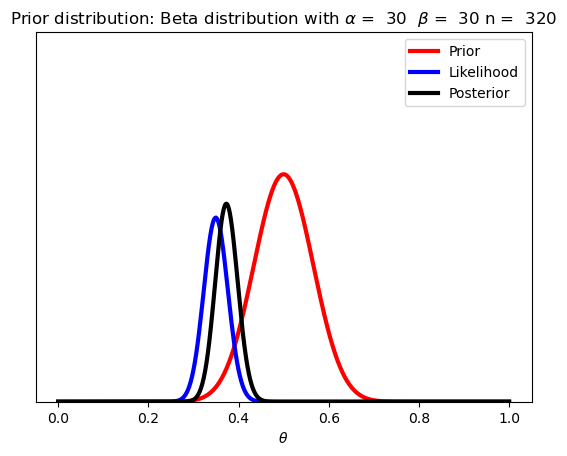

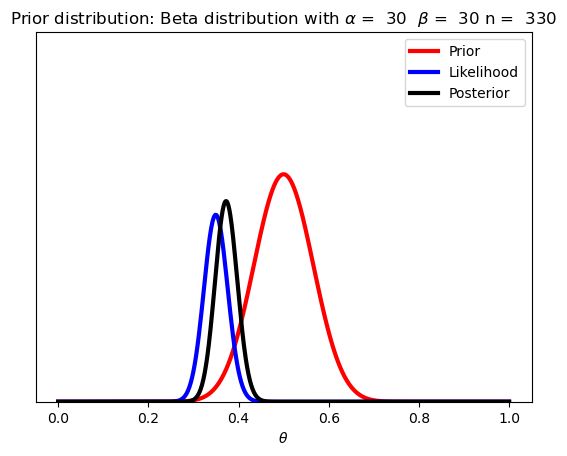

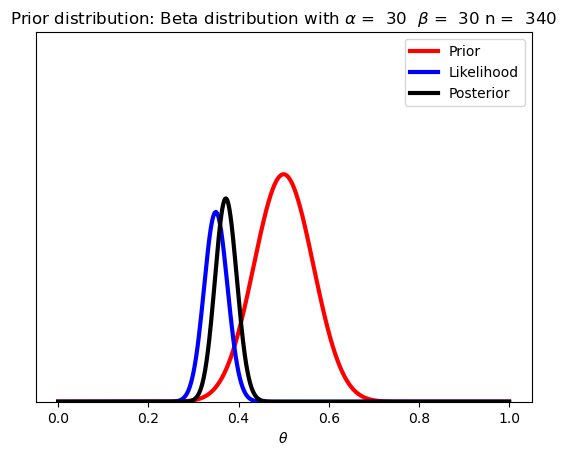

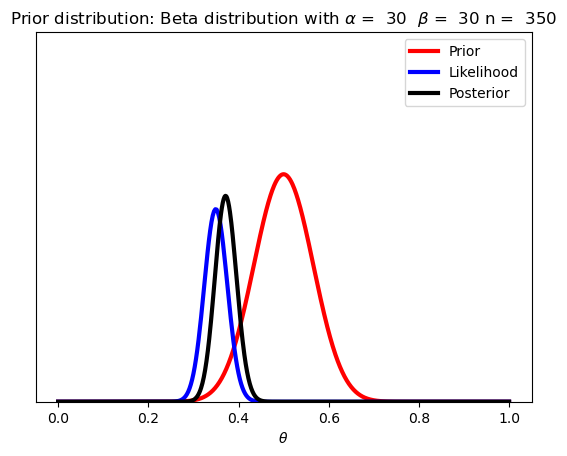

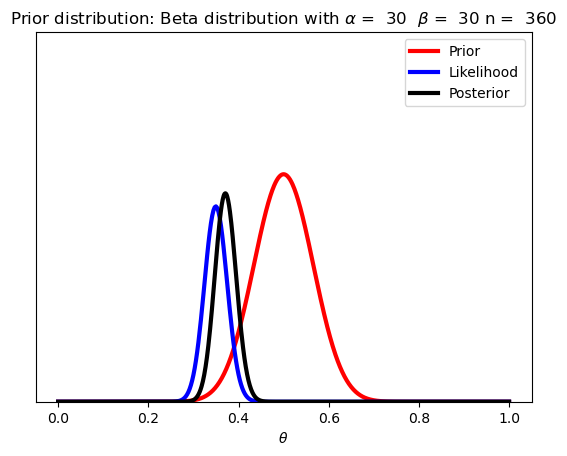

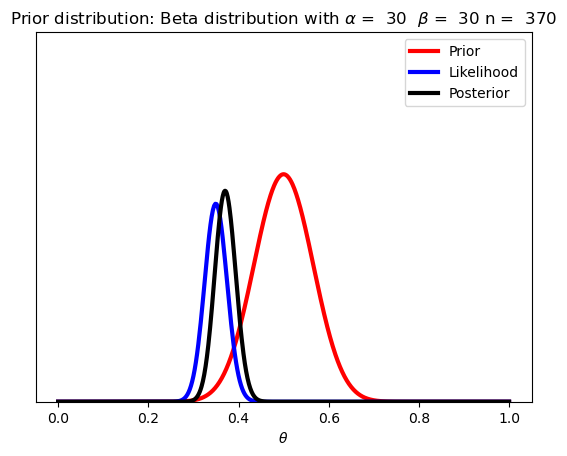

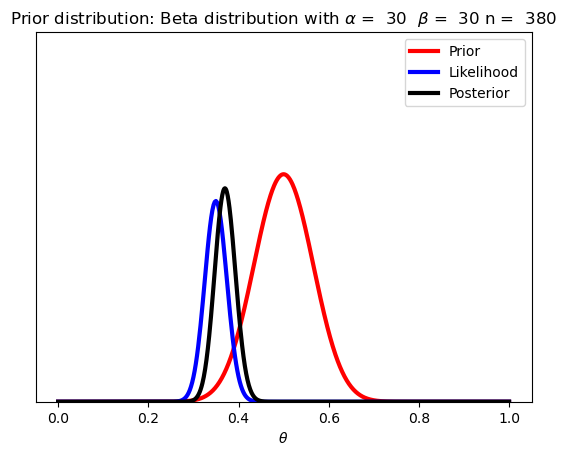

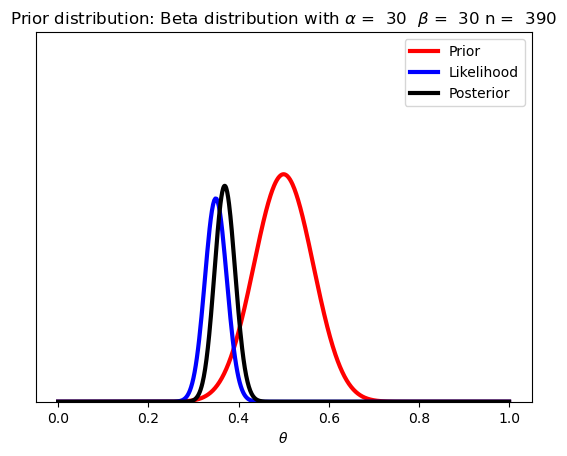

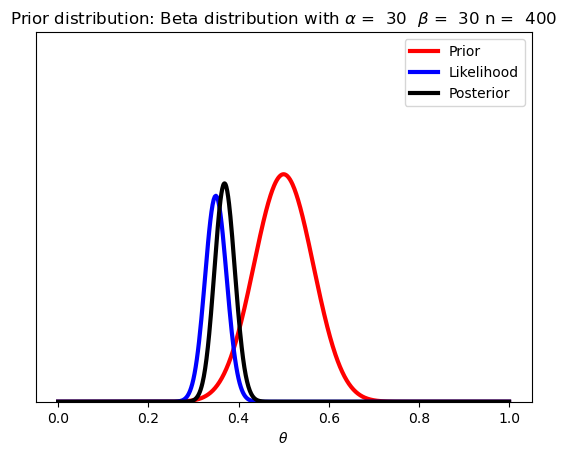

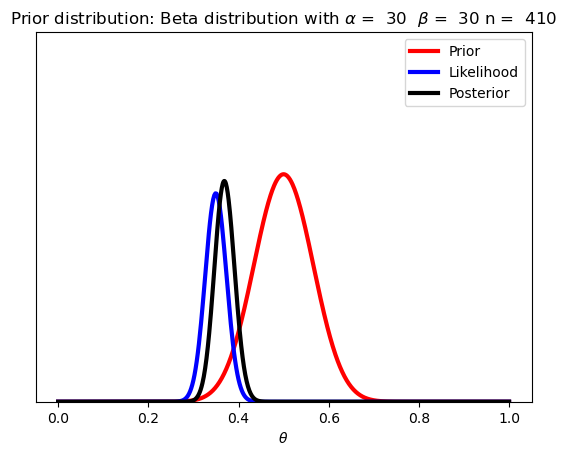

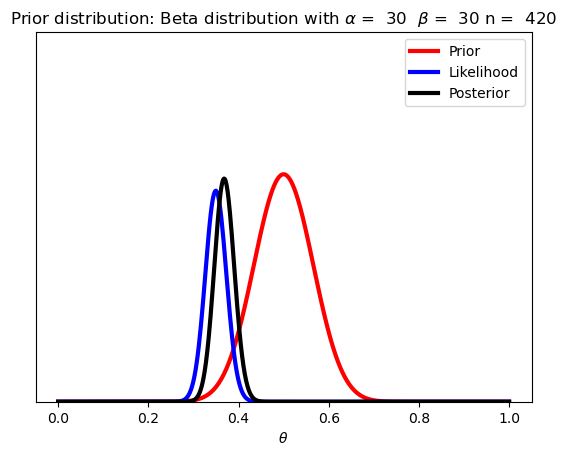

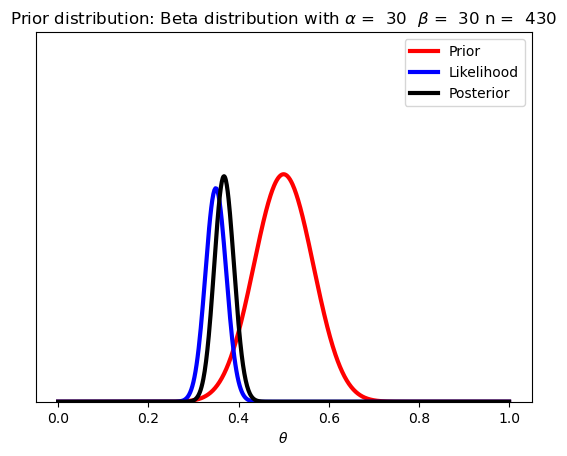

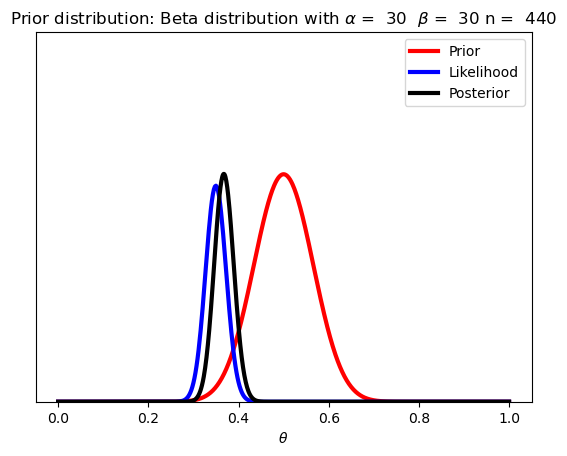

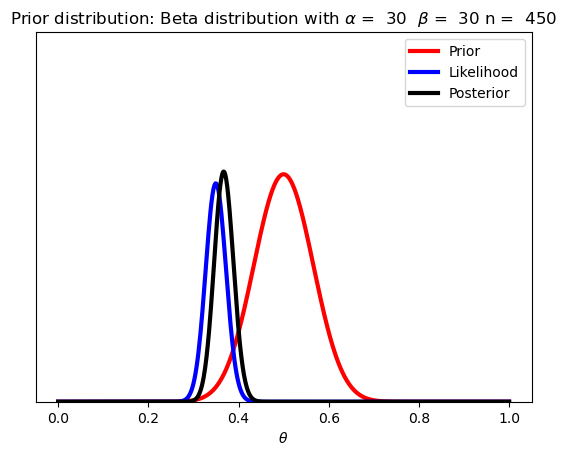

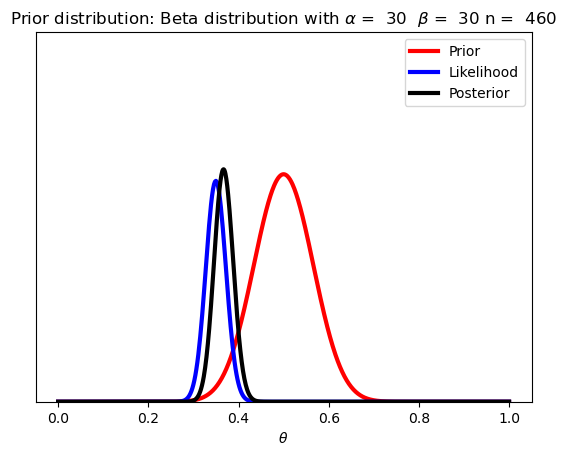

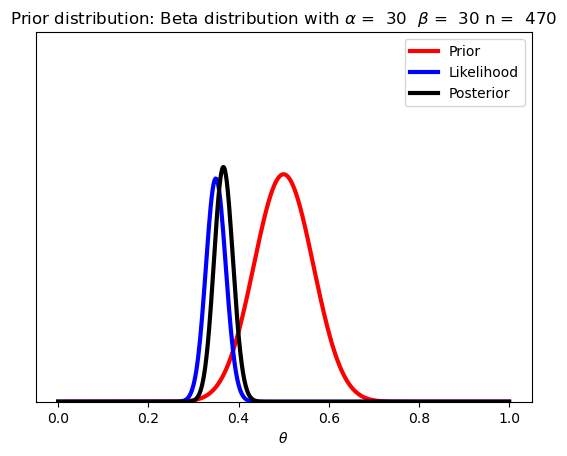

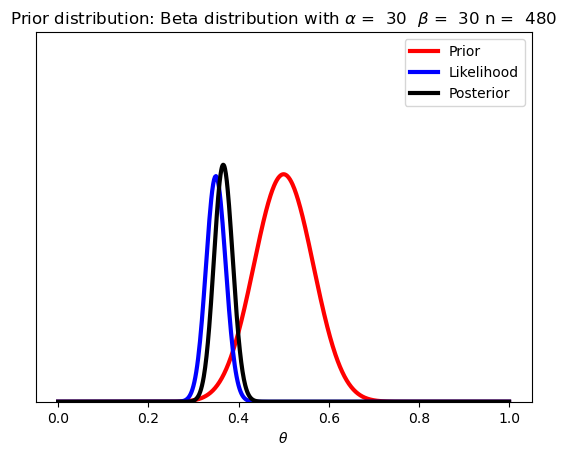

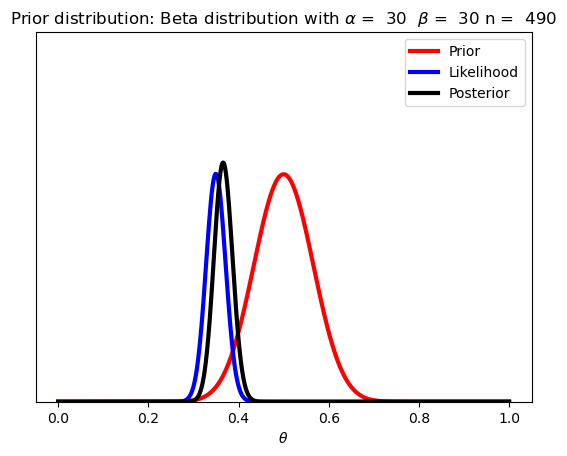

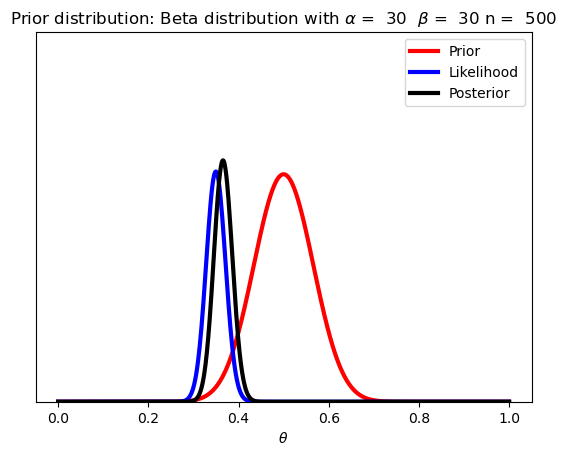

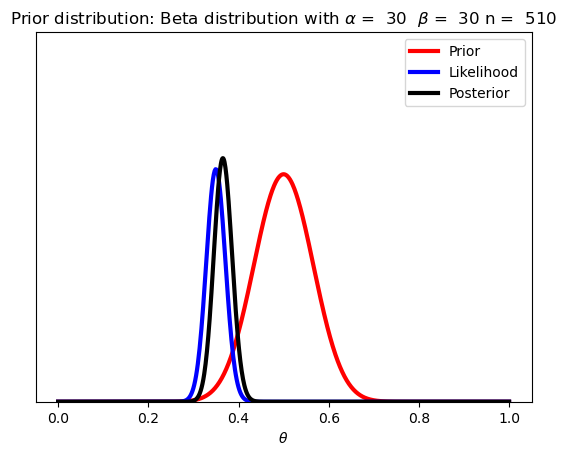

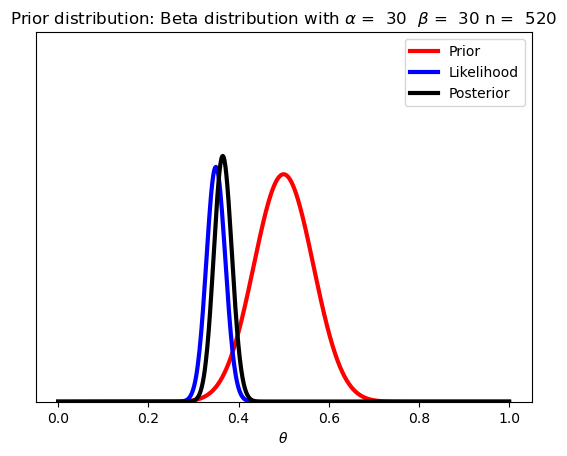

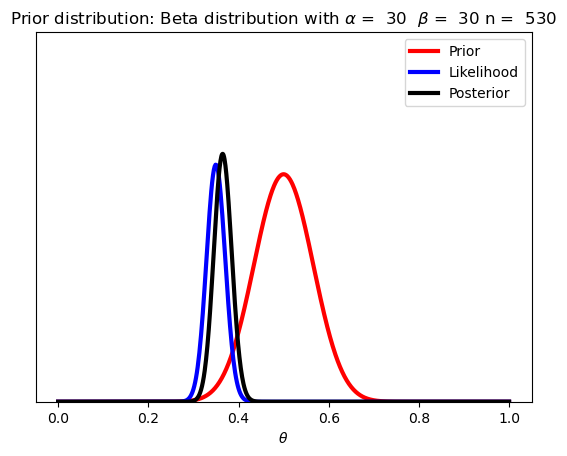

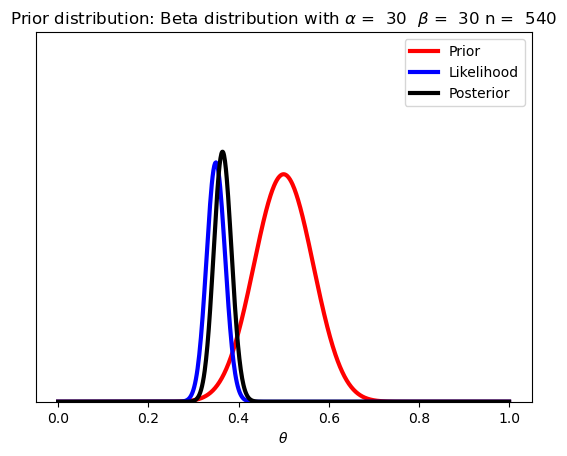

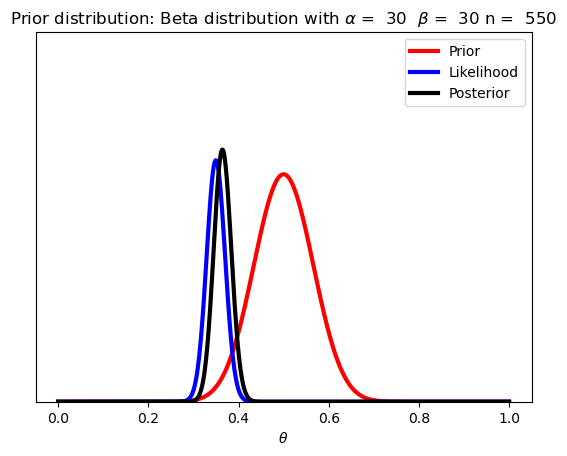

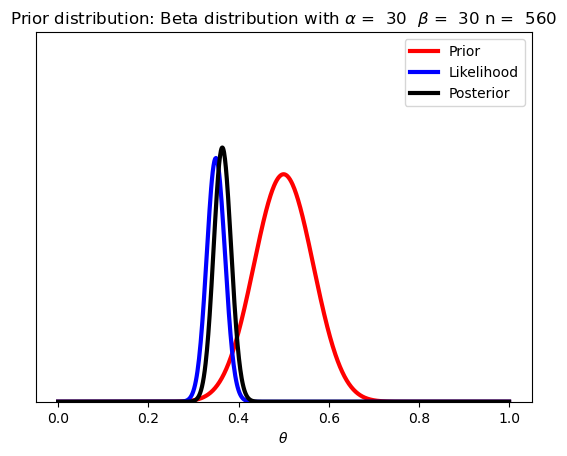

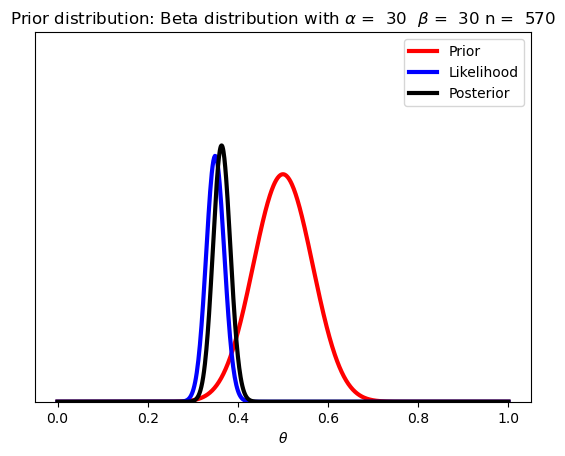

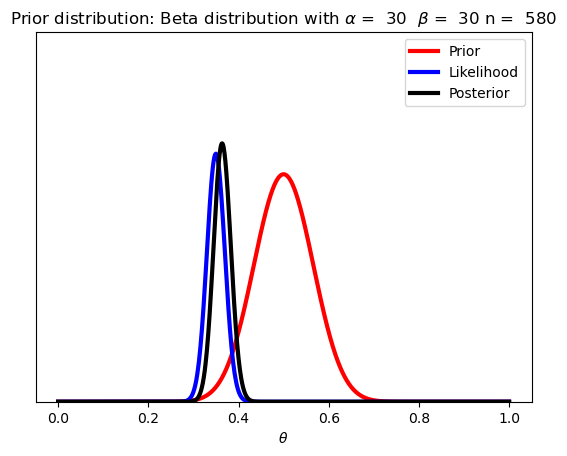

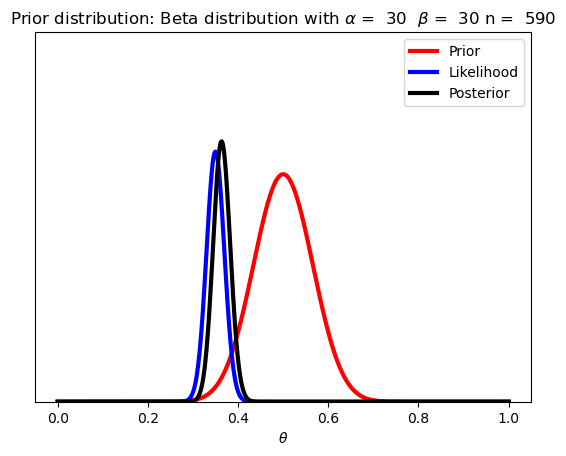

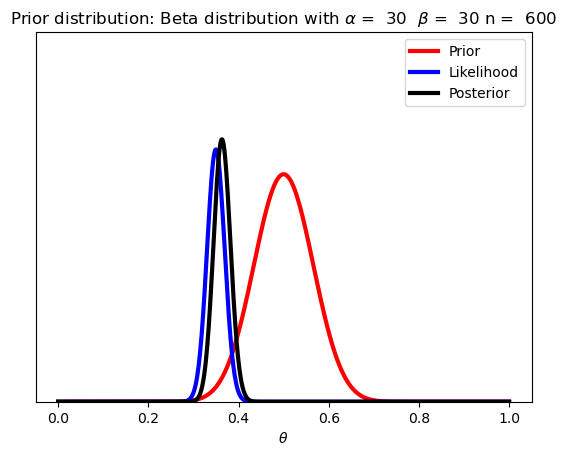

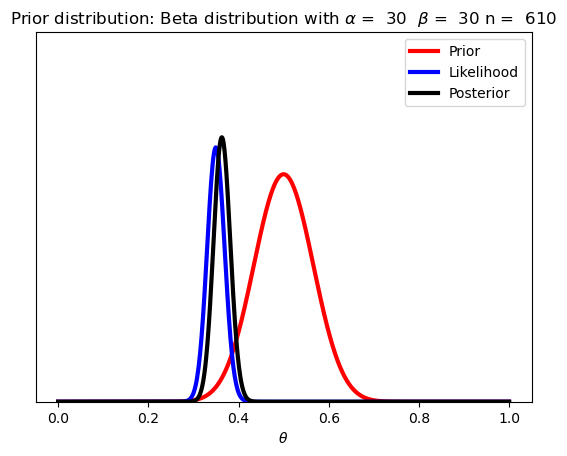

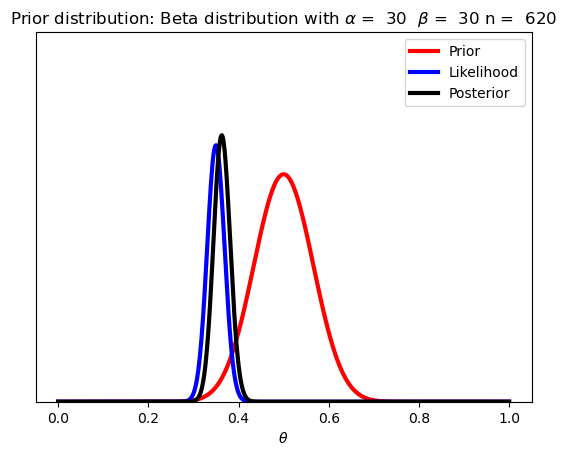

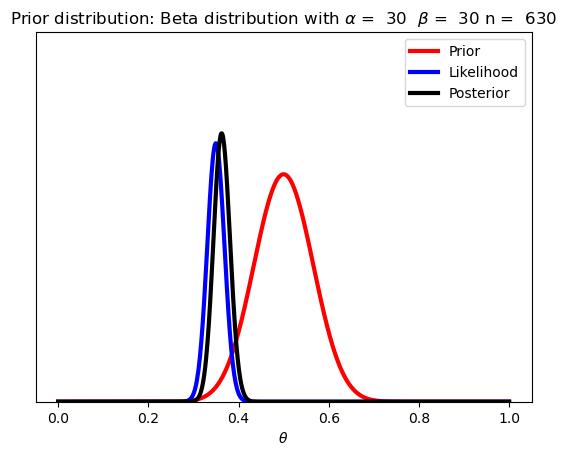

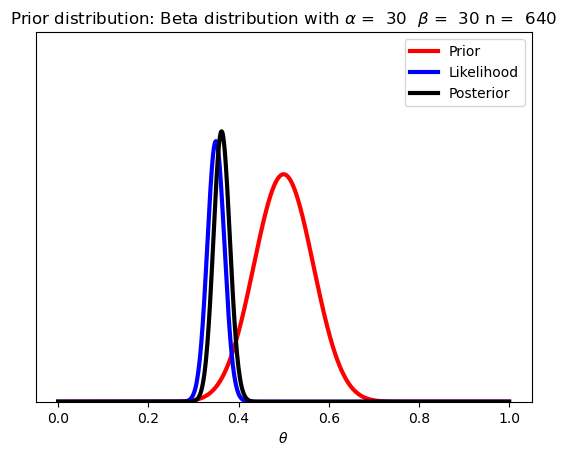

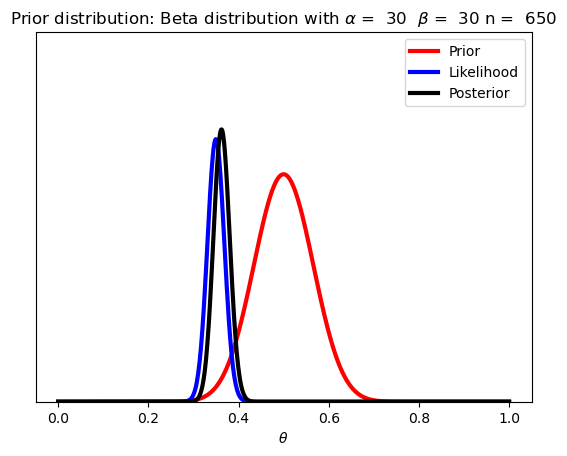

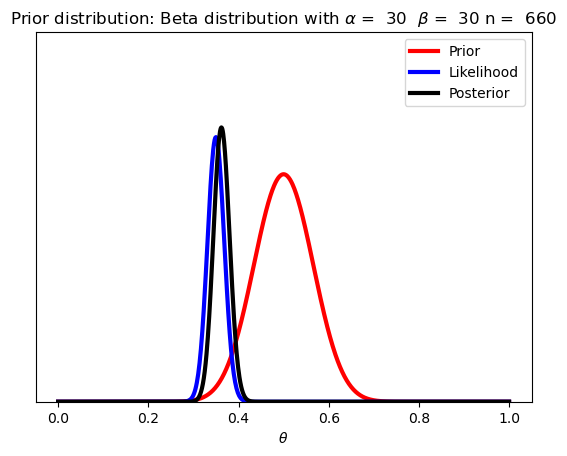

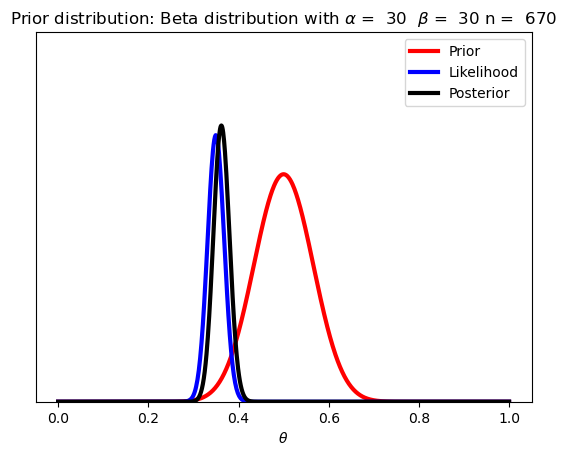

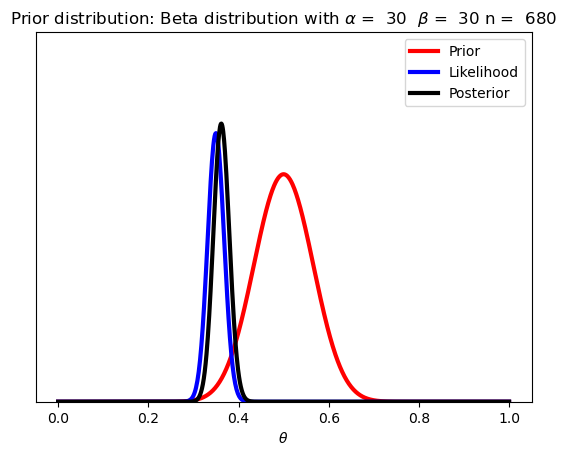

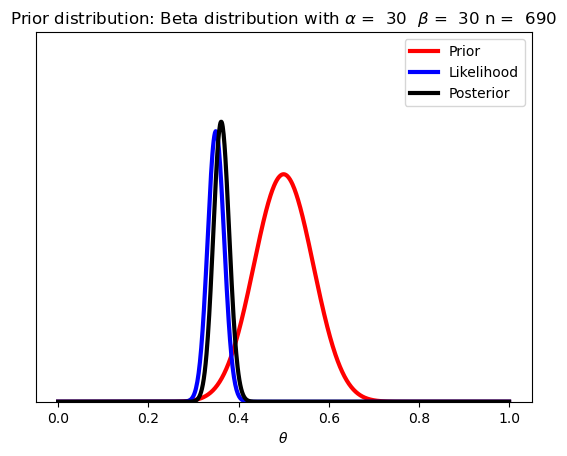

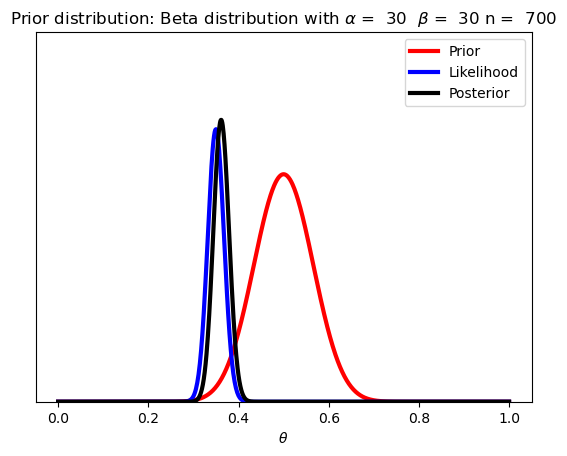

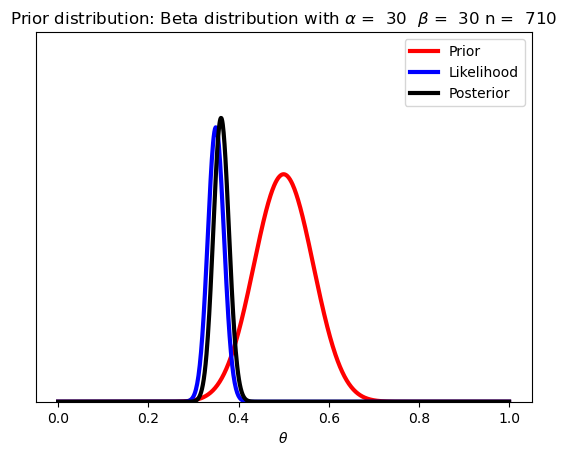

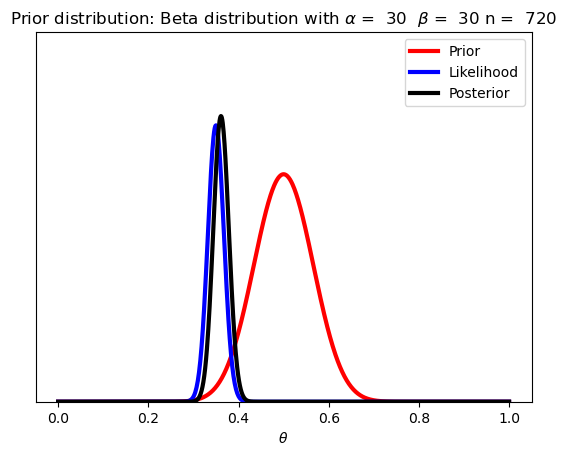

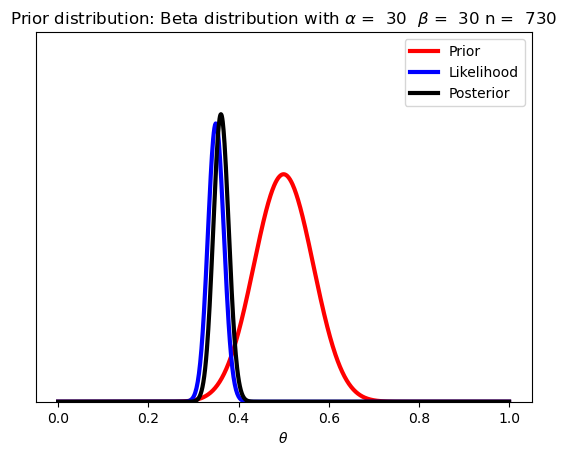

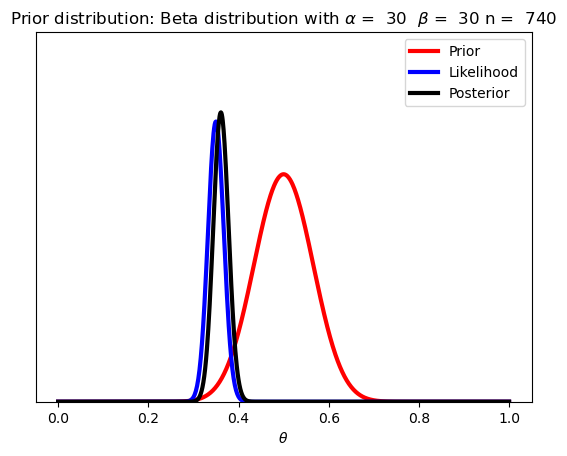

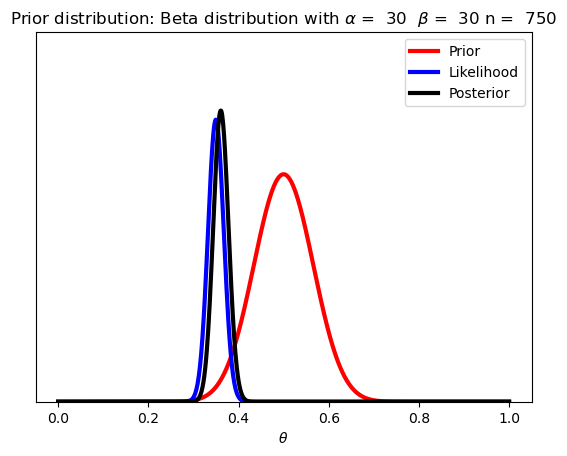

In [12]:
"""
The posterior distribution, which combines the prior and the likelihood, shifts and refines with more data.
Initially, the prior has a strong influence on the posterior. But as more data is observed, the likelihood starts to dominate,
and the posterior gets closer to the likelihood.

The visualization provides an intuitive understanding of how Bayesian updating works
"""

#%% 6. Now combining the prior distribution with the likelihood to yield the posterior distribution

# 1. Init:
numReps = 75 # how many sample sizes are we looping through?
# Each time we are going to increase n by 10!
x = np.linspace(0,1,1001)

# 2. Run simulation:
for ii in range(numReps): # Loop through each rep
    alpha = 30 # Clamping parameters at 30
    beta = 30
    # Modeling the prior as a beta distribution with parameters alpha = beta:
    prior = stats.beta.pdf(x,alpha,beta)
    # Plot the data:
    plt.plot(x,prior,color='red',linewidth=3)
    ax = plt.gca()
    ax.axes.yaxis.set_visible(False)
    plt.ylim(0,10)
    plt.xlabel(r'$\theta$')
    # Use a binomial distribution to represent the likelihood as a function of n:
    n = 10*ii + 10
    para = 0.35
    x2 = np.linspace(0,n,n+1)
    x2 = x2/n # Normalize to 1
    likelihood = stats.binom.pmf(np.linspace(0,n,n+1),n,para) * n/3
    plt.plot(np.linspace(0,1,len(likelihood)),likelihood,color='blue',linewidth=3)
    # Calculate the posterior:
    posterior = stats.beta.pdf(x,para*n+alpha,n-para*n+beta)/3
    plt.plot(x,posterior,color='black',linewidth=3)
    plt.title('Prior distribution: Beta distribution with ' r'$\alpha$ =  {}  '.format(alpha) + r'$\beta$ =  {}'.format(beta) + ' n =  {}'.format(n))
    plt.legend(['Prior', 'Likelihood', 'Posterior'])
    plt.pause(0.05)

In [13]:
#%%7. A more practical example
"""
Scenario: Improving Click-Through Rate (CTR) on a Website
Background:
You're a data scientist working for an e-commerce company. The company has just designed a new layout (Version B) for a product page
and wants to know if it leads to a higher click-through rate (CTR) compared to the current layout (Version A).

Objective:
Determine which layout, A or B, has a higher CTR.

Bayesian A/B Testing with the Beta Distribution:
Prior Belief:Beta(1,1)

Collecting Data: whether a visitor clicks or not
Layout A: 500 visitors, 50 clicks.
Layout B: 480 visitors, 60 clicks


"""
import numpy as np

# Parameters for the posterior distributions
alpha_A = 51
beta_A = 451
alpha_B = 61
beta_B = 421

# Number of samples
n_samples = 100000

# Draw samples from the posterior distributions
samples_A = np.random.beta(alpha_A, beta_A, n_samples)
samples_B = np.random.beta(alpha_B, beta_B, n_samples)

# Check how often the sample from Layout B is at least 1% higher than the sample from Layout A
successes = np.sum(samples_B - samples_A > 0.01)

# Calculate the probability
probability = successes / n_samples

print(probability)


0.76991


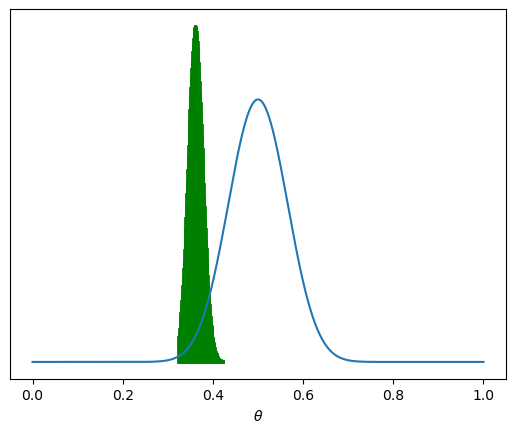

In [14]:
#%% 8. The credible interval - Bayesian analogue to confidence intervals in frequentist statistics

totalProbability = sum(posterior)
cutoff = 50 #cutoff
binMiddle = 374 #Center
fractionProbability = sum(posterior[binMiddle-cutoff:binMiddle+cutoff])/totalProbability
for qq in range(binMiddle-cutoff-1,binMiddle+cutoff):
    plt.plot([x[qq],x[qq]],[0,posterior[qq]],color='green',linewidth=2)
alpha = 30
beta = 30
informativePrior = stats.beta.pdf(x,alpha,beta)
plt.plot(x,informativePrior)
plt.xlabel(r'$\theta$')
ax = plt.gca()
ax.axes.yaxis.set_visible(False)